In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision

from utils import *
from gaussian_training import *

from experiments.dataloaders import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
gaussian_params = []

cov_1 = np.array([[1, 1/2.], [1/2., 1]])
cov_2= np.array([[1, 1/2.], [1/2., 1]])

mean_1 = np.array([0,0])
mean_2 = np.array([2, 0])

means = [mean_1, mean_2]
covs = [cov_1, cov_2]
training_nums = 500
test_nums = 100


[]

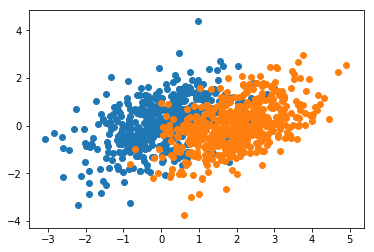

In [56]:
train_data, test_test = data
plt.scatter(train_data.data[train_data.targets == 0].T[0], train_data.data[train_data.targets == 0].T[1])
plt.scatter(train_data.data[train_data.targets == 1].T[0],train_data.data[train_data.targets == 1].T[1] )
plt.plot()

In [59]:


config = {
    
    "data": {"name": "gaussian_mixture", "params": {"means": means, "covs": covs, 
                                                    "nums": [training_nums, test_nums]}},
    "net": {"name": "SimpleNet", "params": [len(means[0])
                                            , len(means), 2, 1]}, # inp_dim, out_dim, width, num_layers

    "torch_random_seed": 1, 
    "batch_size": {"train_size": 16, "test_size": 1000},
    
    "num_epochs":  50, 
    
    "SGD_params": {"learning_rate": 0.001, "momentum": 0.9},
    "num_nets": 100, # would like to make it like other one, where we can define region to initialize
    "ess_threshold": 0.98, # resample if kish less than this
    
    "softmax_beta": -100, # e.g. negtive to prioritize low weights
    
    "weight_type": "loss_gradient_weights" # "input_output_forbenius", # 
    
}

In [60]:
nets = train(data, config)

[98 56 41 85  4 95 32 24  4 70 20 92 47 85 85 14 78 56 89 53 79 13 54 79
 32 64 82 27 51 80 62 85 83 93 20 56 10 76 53 43 80 27 18 85 26  0 26 11
  0 85 80 63 45 14 43 71 61 47 27 93 64 21 25 21 21 31 67 65 40 82 67  4
  1 85 30 86 53 83 89 54 28 15 87 64 47 69 79  3 51 55 60 49 78 37 29 86
 90 64 70 85]
[74 89 81 94 54 20  8 39 60 79 92 39 41 31 14 74  0 93 84 39  8 31 64 59
 49 88 16  9  8 81 38 41 97 61 35 77 35 71 40 49 43 74  4 46 81 86 85 43
 59 54 29 60 49 60 33 31 13 73 39 13  9 35 37 64  0 35 73 29 64 74 67 90
 71 44 18  6 98 49 41 99 81 68 32 46 64 33 45  8 33  7 41 19  6 46 13  3
 30 16 43 75]
[53 93 10 55 53  5 30 21 88 49 48 63 55 87 89  2 42 38 77 97 78 78 60 11
 26 52 92 52 81 21  1 82 58 74 92 77 64 23 80 20 96 62 59 78 46 48  8 46
 45 79  6 56 37 39 20 11 49 69 11 30 57 80 35 88 62  2 16 49 42 55 38 48
 20 62 77 62 61  8  6 86 82 89 51 11  4 45 19 57 92 20  2 45 26 94 56 27
 55 10 63 72]
[30 23 38  0 27 68 36 82 58 23 43  4 72 10  7 19 11 67 94 76 42 24 93 51
 49 96 36

[12 58 35 20 54 59 52 96 37 20 82 21 27 75 81 96 85 23 97 78 75 55 92 45
 16 90 23 20 82 57 70 73 22 71  9 81 92  1 71 21 78 52 75 91 72 72 61 40
 72 28 25 25 36 63 46 20 10 94 79 60 47 90 78 56 76 27 26 14  6  6  0 13
  5 21 83 88 27 42  8 92 96 63 56 96 29 39 93 54 39 64 86 79 60 63 50 18
 50  6 85 60]
[75 37 83 13  6 80 98 56 69 19 73 71 62 40 78 15 89 92 12 45 98 19 12 31
 43 37 81 58 30 37  1 91  7 75 18 43 37 81 28 24  3 43 94 68 68 77 13 24
 37 68 69 47 14 82 85 43 94 20 40  8 46 13 37 97 18 35 44 68 13 12 85 19
 48 10 94 18 33 25  5 29 64 82  8 37 10 26 91 89 24 19 74 13 58 86 28 43
 17 77 34 25]
[63 51 50 29 47 31 50 21 56 93  8 33  3 45 38 46  8 36 90 83 56 30 57 98
 38 80 27 81 70 70 52 50 30 87 88 85 89 72 49  9 17 68 42 17 74 65 54 88
 85  5 85 75 48  0  8 71 36 14 70 67 71 70 93 28 60 12 98  2 87 81 89 24
 61 87 38 46 47 34 78 71 43  4 92 23 45 12 91 14 70 80 33 72 31 53 74 91
 31 25 74 49]
[ 3 61 32 41 99 27 16 19 90 94 28 54  1 14 43 94 25 13 25 62 61 17 24 29
 18 40 20

[53 87 35 60 95 28 29 75 40 80 62 20 35 70 29 60 47  6 11 10  8 67 35 15
 37 64 32 64 67 85 52 70 84 49 47 20 44  3 75 33 35 51 28 36 59 59 29 36
 47 16 95 36 16 20 48 93 22 88 35 18 60 22 12 42 53 20 69 64 81 26 81 25
 20 49  3 18 15 34 75 63 30 31 44 33 51 18 18 81 44 29 26 18 58  6 78 93
 24 47 18 84]
[37 55  4 22 88 12 39 93 43 87 26 86 56 44  6 25 64  6 52 88 28 18 88 45
 87 68 19 38 49  0 26 98  6 29 20 62 26 59 37 99 47 77 89 33 88 33 24 50
  8 68 94 48 37  4 54  3 29 18  9 39 43 34 21 37 87 88 53 77 33 89 63 32
 63 22 35 77  9 82 88 10 38 88 60 22 62 58 16 17  6 83 12 92 49 63 88 98
 94 63 89 68]
[17 32 61 40 61 41 21 11  4 87 36 63 90 38 91 47 19 79 87  6 17 32 96 87
 50 96 89  9 81  4 89 13  1 94 55 44 42 94 87 82 22 64 47  9 21 88 48 62
 83 64 66 51 54 20 42 71 96 59 69 90 18 64  7 48 15  4  5 56 42 42  6 22
 76 62 81 49 31 40 44 15 98 91 41 18 88 84 67 89 25 21 48 91 79 35 33 63
 79 18 87 91]
[87 17 33 94 34 33 31 85 99 61 80 45 33 98 15 70 69 12  4 99 23 46 43 27
 32 96 86

[65 38 95 77 54 33 19 49 45 98  1 66 84 93 76 21 84 75 39 46 90  1 74 78
 47 32 77 95  5 38 12 30 26 77 55  5 65 62 35 43  6 78 81 57 27 38 35 13
 68 89 70 61 76 26 71  1 66 20 31 89 16 70 58 70 45 84 40 28 42 76 82 23
 25 88 40 16 68 54 60 18 85 62 44 65 61 84 79  1 66 52 21  0 63 23 44 50
 64  8 79 42]
[45 73 10 83 72 81 66  8 30 61 68 37 30 93 92  8 75 24  0 76 80 32 91 40
  7  9 13 98 22 84 74 22  3 61 40 34 24 11 24 35 42 50 13  9 54  0 25 32
 17  8 75 37 36 92 65  3 12 37 62 34 18 57 50 22 24 23 91 44 91 85 80 27
 71 88 32 31 13 40 24  2 71 80 12 65 91 27 98 71 23 32 34 79 37 15 66 51
 62 29 80 61]
[80 53 81 95 73 25 70 97 19 82 73  4  4 57 32  6 20 60 43 84 44 63 88 85
 19 38 86 57 35 73 32 81  5 39  5 28 17 33 89 98 67 30 50 95 78 76 19 32
 75 95 87 88 43 41 42  0 31 43 16 48  0 20 85 53 65 33 88 33 25 36 15 88
  7 88 81 22 68 48 86 99 64 96 78  2 57 26 56 66  7 66 92 65 86 24 21 84
 64 81 32 16]
[51 71 81 95 17 36 22 34 99 88 87 83 22 22 44 53  8 47 66 60 51 72 77  1
 47 74 79

[86 51 76 60 61 41 27 79 21 19 37 79 98 96 11 75 68 33 48  8 19 47 26 52
 63 89  4 45 22 90 38 19 98 64  3 75  5 65 22 46 18 38 42  7 49 39 30 24
  2 40 96 42 77 31 70 53 65 60 97 79  7 41 32 59 71 94  8 25 79 39 70 51
 14 60 83 41  4 83  2 31 22 44 31 38  4  8 25 48 26  8 29 60 78 63 25 61
 59 60 25 44]
[23 73 23 65 82 14 26 44 62 36 26 88 18 94 28  9 32 51 36 74 11 69 12 72
 75 28 51 39 50 20 65 24 63 87 75 52 97 49  8 43 47  8 44 51 92 74 62 18
 71 93 99 12 98 69 84 31 78 20 28 44 71 93 31 56 78 87 89 46 34 30 63  8
 67 94 69 12 55 11 74 44 28 20 98 84 87 83 26 97 79 55 48 91  1 78 67 49
 77 79 31 77]
[71 10 52  6 32 76 45 18 61 99 72 22 22 49 38 27 48  3 56 15 23 33 18 85
 24 43 67 14 76 93 81 97 72 58 78 15 61 54 14 79 51 60 56 93 30 85 78  1
 30 67 59 73 84 87 35  2 75 98 76 32 73 99 76 66 20 68 66 17 99 33  6  3
 59 33 55 54 27 11 66 37 77 52 46 67 15 91 99 62 56 51 95 16  5 91 40 55
 61 59 67 56]
[18 67 23 53  9 56 63 71 75  4 16 37 55 56 19 22 53 79 74 72 86 14 81 29
 86 50 63

[58 65 14 17 48 14 91 80 20  4 16 22 66 11 93 14  9  3 10 57 30 26 77 18
 52  5  2 12 63 66  0 48 55 27 55  7 43 42  0 79 90 84  2 47  3  4  4 47
 56  0 13 28  8 28 14 86 36  3 14 80 91 81 35 77 27 21 31 46 33  7 20 16
  8 77 16 81 26 37 37  4 35 17 46 15 13 95 34 23 33 21 59 38 46 73  3 83
 46 33  4 90]
[48 82 46  7 40  3 12 66 57 65 44 34 47 98 37 18 19 87 93 50 11 18 80 66
 90 53 79 13 17 80  8 56 15 68 66 96 93 86 50 45 26 54 98 47 65  5 11 40
 79 34 95 82 36 16 88 50 16 80 35 54 76 64 85 97  7 27 88 47 72 29 19  0
 50 54 72  3 81 92 67  7  9 64 39 94 12 18 62 39 86 95 89 87 44 93  9 16
 16 42 66 93]
[87 62 13 36 59 15 30 77 32 98 71 78 15 54 91 62 53 40 59 64 60 12  2 62
  1  5 93 66 37 62 59 36 94 37 64 57 54  7  4 80 57 95 77 96 77 41  0 71
  2  3 57 89  0 65 63 35 63  8 58  9  8 42 63  1 25 67 76 90 68 97 33 37
 89 94 54 87 30 19 71 86 87 20 61  0 47 77 38 76 76 48 20 50 80 53 14 42
 49 86 80 30]
[25 60 72 72 34 90 47 33 60 85 60 94 90 72 73 43 21 61 61 28 82 44 76 79
 73 73 28

[24 23 32 46 93 78 93 57 95 22 92 89 56 96 68 54 93 59 81 22  5 71 84 72
 59 98 45 97 49  7 88 44 48 90 81 88 36 72 66  2 53 85 74 21 25 86 74 41
 59  2 19 47 87 51 77 66 34 49 90 17 78  2 29 68 95 16 57  6 74  1 60  0
 46 12 21 45 82 89 11 13 66 25 63 46 52 55 30 99 78 85 77 42  2 19 36 33
 26 95 99 61]
[ 6 17 56 40 42 50 68 41 36 23 59 17  6 37 30 58 61 71 65 37 60 20 35 29
 71 39 37  6 50 41 78 26 21 53 81 86 20 59 53 31 72 74 58 37  0 20 81 71
  6 20 48 15 69 81 59 83 81 20 30 36 49 82 20 56 62  4  9 37 12 48 53 81
  4  0  8 72 56 25 10 77 32 31 91 22 79 63 72 66 17 16 26 77 36 77 71 59
 77 55 30  6]
[40 76 52  2 65 33 25 82 11 52 88 37 20 48 93 98  2 23 69 46 39 29 68 80
 57 36 19 89 50 88 17 48 54  8 32 28 49 52 13 82  2 89 56 73 75 61 35 13
 62 18 74 11 49 84 88 12 25 40 69 32 13  2 38 95 56 23 48 45 60 37 64 72
 37 56 27 41 69 67 31 74 83 92 19 66 94 26 59 67 30 97 81 18 82 99 94  4
 11 74 63 48]
[62 55 44 97 76 30 98 56  1 81 52 76 30 77 99 59 68 42 12 39 49 74 59 19
 17 54 13

[39 36 43 46 53 76  6  7 84 85 31 20 84  9 68 18 41 62  6 50  5 11 46 21
 73 68 72 60 33 53 80  4 11 61 45 20 74 72 91 54 21 90 13 21 46  9 53  9
 20 39 50 36 91 11 17 99 59  6 84  9 50 43  7 89 55 77 82 50 62 27 63 85
 52 94 99 49 83 87 77  1 71 29 30 20  5 10 72  3 58 65 88 76  5 93 46 96
 46 11 58  1]
[87 91 45  9 85 35 11  4 64 49 33 33 49 73 31 90 48 12 85 92 15 42 98  1
 12  9 49 78 53 42 82 26 73 64  2  7 66 47 15 83  0 63 20 88 79 37 89 21
 59 17 41 11 15 83 61 74 19 14 66 14 64 58 26 98 18 53 88 56 18 33 36 84
 65 60 72  4 64 64 17  8 80 17 61 23 49 35 65 81 42 49 19 38 32 49 91 60
 61 21 55 51]
[ 6 94 22 86 71 21 70 59 12 48 32 85 41  7 63 48 44 12 73 71 46 18 67 10
 61 88 86 50 11 89 41 12 84 19 64 56  1 19 25 63 95 72 38 72 16 56 41 37
 37 94 84 84 25 68 64 96 85 34 32 88 57 87  8 26 11 70 38 30 73 89 97 57
 35 38 96 88 61 11 14 69 19 12 24 13 11 18 48 68 96 47 40 93 46 30 62  9
 25 15 57 12]
[ 3 21 92  3 83 65 81 39 32 45 54 34 68 32 47 61  5 11 81 10 50 91 74 77
 73 38 66

[83 52 90 25 80 47 38 14 67  1 61 62 92 68 62 63 72 33  4 35 59 88 61 70
  4 26  3 67 70 35 68 40  7 90  2 14 90  2 93 95 31 73 69 32 19 35 53 70
  0 72 81 22 75 59 97 18 70 12 15 87 72 53 87  0 46 90 72 18 90 18 51  0
 72 22 49 47 61 71 19 91 78 37 51 67 81 53 47 86 71 99 60 74 59 52 15 72
  5 59  9 50]
[ 3 13 55 63 94 73 74 67 10 59 75 90 94 40 27 96 96 20 73 63 76 42 30  0
 15 48  2 25 94 70 74 21 58 13 41 96 74 66 73 84 50 43 61 67 78 28 31 27
  3 97  2  6 25 10 89 43 84 96 92 43 73 74 81 75 79 76 36 22 35 95 12 93
  7 96  1 76 75 93 28 83 99 71  4 23 34 83 70 87 18  3 50 24 68 89 16  7
 22  3 28 94]
[44 83  3 24 63 63 88  8 49 17 94  3  4 23 41 33  5 12 12 98 86 30 13 59
 11  4 64 75 93 77 13 34 90 70 23  3 35 19 75 33 16 23 32 12 96 95 27 15
  2 31 87 21 16 48 67 99 99 39 37 29  2 57 18 88 58 17 10 30 85  5 88 90
 79 50  7 45 33  8 70 39  4 22 26 64  5 56 75 81 16 26 34 63 97 10 93 82
 69  7 10 53]
[80 38 27 41 34 46 37 82 94 56 91 77 27 48  0 55 19 61 77  3  7 41 39 54
 29 40 95

[ 5 98 34 11 43  9 65 24 51 16 59 46 89 76 66  5 17 79 86 90 51 45 10  3
 13 68 33 65 79 33  0 64 36 10 75  8 21 73 74 80 59 16 64  9 45 12 24 67
  7 91 80 43 12 44 27  9 68 65 51 44 52  9 94 82 13 86 15 92 29 69 12 40
 81 86 40 43 40 24 27 73 44 69 27 58  8 33  9 39  9 36 55 87 16 28 70 59
 21 11 93 42]
[18 81 18 95 27 37 31 67  8  4 64 18 42 22 72 77 71 33 92 37  7  9  8 51
 10 72 70 56  1 18 62 76 56 70  9  4 38 46 28  8 77 21 22 74 54 77 14 95
 48 83 86 53 31 66 53 58 98 51  0 39 27 58  0 48  1 98 35 89 59 74 48 42
 99 41  9 56 16 83  7 53 73 22 76 22 53 60 18 15 46 82 67 82 46 95 38  9
 69 18 27 98]
[87 34 71 61 31 87  6 37 47 34 71  1 26 33 69 25 47 59 89 20 61 33 52  4
 48 58 38 10 99 13 61 45 74 31 55 80 37 58 82  4 52 89  0 21 80 97 52 11
 16 10 31 49 72 11 92 61 47 33 21 13  3 61 82  4 54  8  4 99 22 74 45 89
 60 10 50 52 38 20 45 77 35 11  1 74 30 38 76 41 87 99  5 48 54 99 87 30
 28 19 42 58]
[84 50 91 76 42  7 18 45 95 89 53 51  1 89  7 70 39 39 63 37 99 32 20 25
 75 37 85

[11 28 50 96 48 68 68 89 26 94 45 36 30  7 62 50 52 19 34 63 11  3 37 27
 28 56 93 63 29 95  0 13 34 13  8 74 82 81 28 89 97 46 32 22 67 93 89 51
 26 59 74 15 72 14 14 63  9 72  0 16 71 84 74 99  8 57 72 69 80 99 97 88
 47 53 85 39  3 73 30 54 11 34 93 68 10 91 56 96 74 26 42  2 62 27  3 91
  6 88 95 18]
[39 38 55 92 90 63  4  8 54 10 51 79 60 53 53  8 80 98 82 73 71 11 72 87
 88 33 45 77 22 99  7 79  0 46 92 77 69 82 99  4 49 31 78 53 91 42 42 78
 38  5 90 59 87 28 92 90 75 17 40 56 29 76 85 84  2 30  0 29 44  2 77 91
 39 72  6  7 78 66 22  6 38  4 96 40 30 65 29  4 74 86 29 14 38 11 99 33
 29 96 20 86]
[61 54 58 77 36 84 57 99 26 44 48 32 93 55 44 44 85 39 54 97 53 10 42 23
  9 17 45 58 48 48  3 10  9  7  9 93 65 67 95 33 95 79 39 17  4 83 20 81
 96 67 83 90  2 38 88 44  7 43 35 70 85 31 13  9 81  9 73 82 52 65 57 92
 97  9 62 36 69 83 40 94 65 69 89 44 33 44  3  6  3 23 39  2 82 93 13 25
 98 93 10 88]
[19 47 78 77 68 35 38  3 10 78 14 83 32 64 82 10 32 68 63 76 20 28 88 78
  5 84 20

[44  4 38 74 27 14 90 32 13 29  4 31 68 26 45 52 94 17 79  3 45 92 77  2
  0 99 46 77 54 94 27  7 13 39 95 42 87 41 31 94 56 35 22 39 97 27 65 79
 62 73 81 58 40 45 75 52 94 85 65 17 80 73 65 26 29 65 75 46 65 85  0 18
 45  2 63 85 57  0 20 25 99 54  7 13 41  1 18 13 46 58 95 62 88 71 79 60
 95 67 87 42]
[99 51  7 45 13 26 82 39 69 25 22 44 16 64 55 32  4 40 45 45 22  8 28 17
 74 90 30 78 43  2 63 24 17 26 77  3 29 26 59 45 29 33 30 59 99 83 52 95
 99 56 40 65 50 72 45 49 74 43 84 16 73  9 90 95 47 68 40 33 57  1 31 70
 94  5  7 35 19 75 57 39 74 73 94 67 13 20  4 15 20 16 84 99 40 12 96 26
 42 55 62 16]
[ 8 28 32 61 50 73 77 29 28 99  5 14  5 52  3 81 94 55 70 26 18 73 93 16
 58 39 35 18 32 99 38  9 48 50 57 30 64 11 27 71 68 99 72 88 73 16 95 87
 66 92 60 91 20  8 47 34 82 93 73 31 37 30 65  2 55 52 20 66 44 27 29 97
 33 73 87 48  5 70 57 80 10 33 44 44 88 82 81 96 70 29 52 80 57 10 58 45
 29 78  8 95]
[64  8 76 32 77 84 82  3 11 58  1  6 47 92 87 83 85 71 84 88 43 14 61 79
 81 86 95

[41 69 29 82 99 43 55  8 20 61  4 90 91 25 31 11 90 37 63 31 88  5 65 84
 25 44 74  1 75 17 21  1 15 95 63 23 73 72 65 20 50 60 10 25 41 48 95 77
 48 10 72 60 95 88 44  2 11 32 92 83 90 56 88 48 60 80  7 79 17 96 11  4
 95 16 18 75 64 83 14  4 15 76 13 15 96 41  1 31 17 28  6 21 92 64  8 38
  5 89 79 40]
[98 66 13 80 53 59  8 54 58 61 61 75 95 24 62 30 19 35 64 96 28 60 24 48
 73 77 45 66 61 71 22 14 92  6 91 52 49 77 60  9 82 40 62  7 31 68 67 43
 23 88 71 36  6 42  5 53  4 26 62 12 50 48 24 61 99 25 10 18  4 92 56 42
 23 52 85 50 31  0 66 40 90 12 19 38 48 90 65 67 48 60 29 58 89  7 86  2
 71 30  0 94]
[17 81 93  7 62 34 98 11 23 55 11 47 99 79 62 14 54 72  9 13  2 75 69 84
 27 98  7 56  4 54 62 81  5 34 85 28 10 73  5 77 23 55 95 78 93 81 49 77
 17 40 19 35 89 70  5  9 14 42 18 15 93 31 28 46  2 95  9 57 53 16 54 76
  2 10 69 77 90 51  3 86 59 16 27 84 79 44 12 53 95 51 27 53 77 29 38 46
 25 55 53 84]
[89 46 22 36 99 72 20 33 56 80 36 35 22 77 38 34 44 23 49 44 65 44  3 90
 68 56  2

[65 52 63 94  5 76 72  3 27 61 57 91 41 29 29 41  7 86 59  4 30  6 97 16
 66 31 51 22 53 55  9 86 37 27 29 67 81 32 22 54 77 13  6 48 40 13 99 38
  4  5  3 14 65 76 91 61 93 98  1  3 30 94 10 56 13 26 72 27 56 44 82 67
 74 38 56 93 32 13 72 49 91 73 23 84 98 46 37 53 40 88 82 37 86 43 41 55
 74 73 95  5]
[71 21 45 93 55 24 96 80 79 57 62 93 56 86 91 96 91 89 21 62 47 56 16 26
 67 41 41 17 34 92 41 88 15 69 40 65 33 70  7 84 68 65 18 37 38 56  2 17
 21 50 93 88 11 20 89 61 70 22  2 20 66 40 97 67 88 59 88 87 65 59 93 93
 23 35 89 84 24 87 34 12  2 96 80 13 45 57  1 41 81 10 58 93 77 86 29 74
 59 78 25 37]
[10 11 80 36  0 69 25 89 54 18 69 57 99  9 64 93 63 42 46 40 49 17 99 10
 37 28 40 26 44  0 46 28 53 55 41 87 74  8 24 14 23 83 88 70 24 86 25 66
 30  3 11 81 64 31 30 94 91 41 66 80 92 36 53 76 69 35 36 80 65 13 99 46
 25 61 37 97  4 28 97 75 49 26 80 74 99 10 61 15 17 64  5 56 64 86 66 18
 40 45 67 44]
[ 0 91 48 12 21 27 21 20  8 55 11 52 46 56 89 81 12 46 82 57 85 84  3 31
 17 38 34

[22 39 81 37 13 81 44 82 73 31 82 17 66 48 38 39 77 16 68 18  7 41  9 15
 18 80 87  0 52 15 36 65 47 99 46 75 47 33 27 46 34 68 77 15 47 64 82 66
 46 37 99 80  7 73 79 46 35 72  1 15 82 46 66 15 97 56 39 63 94  2  8  1
 44  1 75 86 37 99 26 73 38 89 57 20  3 59 77 64 62 59  7 41 39 37 54 41
 47 32 70 85]
[41 64 26 75  6 79 49 96  4 95 21 97 31 93 70 48 75 79 35  4 44 66 48 24
 55 96 20 29 72 48 28 50 75 12  5 39 33 35 52  4 29 24 90 97 33 90 20 29
 83  6 51 73 76 76 48 49 55 23 52 53 97 28 55 54 32  2 19 30 29 39 34 75
 37 34 26 97 24 96 99 24  8 65 41 43 97 76 66 39  1 21 45  1 85 34 80 85
 72  1 78 44]
[88 31 92 56 56 48 55 40 49 20 79 36 99 64 43 13 36 98 25 40 65 11 92 40
 47 16  3  3 52 22 98 78 86  3 30 99 11 99 21 63 37 53 26 97 40 77 78 14
 98 21 45 14 55  0 99 49 42 76 16 83  5 45 74 20  3 41 53 90 46  6 38 22
 35 63 84 90 64 27 35 64 18 22 57 31 23 49 40 29 91 50 34 98 37 25 66 15
 88 11 57 20]
[ 2  5 71 67 86 60 11 65 56 67 30 26  4  1 72 29 84 24 85 91 60 33 66 10
 25 56 74

[68 89 55 42 63 91  6 10 74 84 78 67  8 29 89 71 41 19 25 57 66 81 35 25
 35 13 72 58 63 15 51 10 22 23 23 59 23 88 69 53 21 68 11 16 98 95 15 21
 56 28 32  8 62 49 51 48 46 41 41 72 29  5 78 63  1 79 96 82 51 19 30 58
 10 22 21 48 14 43 69 67 32 46 95 33 18 13  3 21 23 22 56 69 59 67 34 28
 66 60 94 46]
[93 74 97 58 22 98  0 96  1  4 48 18 79 78 52 55 26 79 44 26 70 55  4 90
  4 44 54  9 98 62 31 12 15 45 97 42 45 83 13 86 20 60 43 96 86 55 58 99
 65 96 77 13 33 59 25  0 87 92 17 72 33 24 54 45 16 24 31 54 97 45  4 98
 82 43 52 15 82 60  1 11 71 59  9 66 60 66 25 37 44 40 24 99 72 89 15 16
 66 74 52 80]
[86 89 33 21 86 95 21 99 76 10 64 61 67 55 54 67 10 20 42 73 63 27 87 34
 20 32 61 20  4 54  5 45 94 65 39 33 95  2 82 63 55 52 40 52 16 43 60 55
 75 57 31  3 71 20 71 22 31 91 20 38  5 76 11 61 45 16  5 67 83 86 91 27
 73 39 97 53 91 68 87 73 41 87 52 67 73 30 52 12 34 85 50 18 39 93  2 39
 43 50 54 46]
[97 63 52 88 67 41 65 68 45  7  4 89  2 60 91 77 84 44 75 15 76 97  4 13
 70 85 13

[90 29 25 32 91 83 90 91 24 63 22 18 48 88 64 87 45 18 26  2 77 62 45 75
 97 60 50 29 15 33 18 49 55 15 24 42 57 36 13 50 45 21 54  6 55 98 22  6
 15 46  6 91 48  6 81 59 55 26 99 59 11 87 88  6 67 11 72 53 59 67 24 56
 67 83 15 64 13 72 18 28 30 39 10 15 15 88 13 91  9 29 57 83 67 20 20  0
 24 29 71 85]
[45 61 54 59 93 35  8 93 17 83 19 48 60 77 44 11 37 97 48 31 44 32 53 18
 78 74 73 53  5 27 38 95 45 45 14 98  7 59 62 17 29 49 11 65 40  0 88 94
 74 55 46 41 83  0 97 57 59  1 27 85 39 63 39 35 27 26 35 51 76 50 17 49
 28 95 32 52 29 96 80 83 28 48 76 27 91 15 33 32  2 43 36 63  8 47 14 14
 64 10 71 30]
[67 28 21  5 24 25 26  3 74 16 61 11 38 12 88 68 63 67 86 46 81 81 70 86
 87 74 40 18  6  4 89  6 74 61 31 37 12 37 94 10 55 94 83 91 46 63 84 75
 41 47 41 74 87 49 37 39 81 89 12 61 28 55 57 56 16 70  6 45 53 50 28 23
 92 96 82 94 40 79 33 87 99 53 55 23 26 26 73  0 37 54 94 98 54 67 93 87
 38 84  7 53]
[83 27  6 20 96 64 27 32 71 36 74 49 53 42 71 69 87 29  3 20 87 16 21 75
 57 17 29

[ 2 20 49 11 91 81 57 72 72 58 90 56 75 21 96 93 40 23 23 96 56 29 58 73
 72 16 30 10 78 95 75 58 68 58 41 75 46 52 67 80 20 73 12 18 19  3  8 13
 86 42 27 67 76 44 88 25 92 92 12 23 68 19 44 96 44  8 36 84 29 86 75 89
 44 39 95 75 36  3 73  5 52 49 48 28 93 23 40 53 57 33 41 52 81 36 41 20
 57 97 24 85]
[46 89 36 15 93 53 12 40 60 64 94 94 48 66 23 39  5  3 43 24 93 60  4 33
 69  6 76 54 11 23 56 12 94 69 38  0 14 25 56 38 33 68  5 80 25 54 68 81
 91 61 52 61 93 73 38  4 50 18 94 76  5 93 80 82 63 48 68 55 58 59 44 76
 21  2 13  2  4 93 77 62 69 87 32 39 51 69 84 15 70 25 37 34 56 14 78 23
 61 66  2 83]
[90 80 19 67  4 24 21 51 43 47 86 52 23  1 15 18 43 80 37 43 53 35 87  6
 38 50 58 52 11 99 18 44 82 98 55 79 97 53 88  1 54 79 13 69 47 78 42 15
 67  7 17 75  8 51 14 88 65 74  7 94 75 87 83 29 19 68 43 50 36 31 55 35
 87 21 81  6 19 87 83  6 38 18 80 30 37 59 13 64 51 75 48 70 19 79 24 49
 68  7 43  8]
[55 82 19 57 54  0 41 94 46  6 53 15  8 48 31 56 69 76 70  9 31 15 42 12
 63 22 89

[95 89 14 92  3  3 38 36 86 67 95 95 22 99 55 82 48 91 76 64 98  3 11 18
 82 23 38 42 90 27 56 22 63 20 19 83 55 28 85 32  9 65 73 53 60 40 47 74
 64 64 71 74 22  6  7 34 22 25 93 16 36 45 31 15 36 72 93 16 11 13 70 55
  9 96 59 18 42 71 46 32 18 24 28 66 90  3 64  1 22 87 92 50 27 15  5 37
 86 38 69 42]
[87  3 12 78 62 35 21 19 25  1 88 87  6  7  9  5 56 49 84 85 88 85 85 33
 98 26 89 85 30  3 76 75 52 11 85 23 45 80 44 86  3 20  8 17 85 28 57 28
 54 87 64 78 48 33 65  0  3 21 46 78 64 77 28 92 15 11 68 44 26 35 83 92
 46 21 16 22 40  3 64 87  6 84 47 28  0 77 40 39 84 38 26 14  4 22 75  1
 77 27 27 88]
[91 52 15 67 48 67 18 60 89  4 45 57 46 72 65 45 49 72 64 16 80 49 27 53
 40 20  9  4 90 83 70 85 22 37 46 35 79  4 67 36 33 70 51 58 51 87 72 90
 73 81 95 81 13 85 67 34 64 51 36  9 19  4 76 47  3 63 76 55 60 54 66  3
 84 32 18 58 37 79 37 64 41 63  0 41  5 12 14  0 66 45 61 33 89 38 18 45
 26 86  1 89]
[42 80 64 59 66 65 85 99 50 52 57 66 16  8 92 72 45 37 58  0 96 91 80 90
 98  5  3

[ 3 36 53 44 66 84 40 91 90 20 48 88 20 74 14 22 69 14 52 64 17 23 97 21
  9 21  8  3 84 82  2 43 79 98 40 76 90 94 55 97 31 30 99 79 99 20 61  2
 29  1 95  3 69 79 80  6 35 45 17 43 15 89  2 95 39 88 67 30  6 90  5 95
 31 88 71  9 53 12 72 59 29 12  2 73 44  3 55 91 56 33 14 49 63 61 62 10
  1 79 13 88]
[48 16  1 70 85 77 53 27 78 68 96 21 30 51  7 61 16 74 68  1 43 27  9 68
 39 58 51 11  5 25 53 71 71 35 53  8 51 95 58  0 96 58 80 16 56 53 54 11
 16 23 78 65 51 32 53 14 78  8 69 19 47 72 91 43 57 32 97 67 53 15 37 55
 62 16 72 16  6  5  0  8 50 97 27 71 82 11 79 80  5 83 47 79 79 42 11  8
 72 49 22 13]
[10 44 13  6  0 88 70 66 10 88 99 41 25 90 35 17  1 19 37 52 39 15 74 19
 39 15 99 63 75  8 42 79 93 20 93 15 65 91 47 35 43 72 84 19 82 93 28 86
 19 21 94 14 23 51 48 96 38 47 79 28 44 10 53 99 71 34 93 13 19 35 33 99
 65 82 35 15 22  4 48 26  2 44 41 64 28 99 22 41 49 72 27 74  2  6 96 15
 28 36 72  4]
[70 58  0 73 39 96 35 64 87  6 45 31 45  7 27 88 91 44 47  0 77 32 73  5
 15 55 86

[67 52 58 71  0 42 31 35 63 84 52 76  7 51 88 20 15 84 92 86 25 21 23 24
 29 84 26 54 52 12 35 46 76 26 89 15  6 74 73 41 88 40 72 91  7 32 92 84
 84 40 42 42 51 44 94 27 83 91 56 98 54 28  9 35 54 31 12 39 60 46 45 29
 27 54 38 14 58 56 36 56  5 92 61 76 39 33 61 12  2 97 24  6 67 13 21 71
 38 33 75 27]
[ 9  0 78 69 28 28 46 34 87 94  4 39 73  5 46  4 49 11 96 28 85 85 24 34
 42 17 66 52 69 89 36 95 60 90  5 76  0 94 34 97 68 24 33 40 89 65 48 36
 64 52 32 71 74 64 54 55 63 41 83 91 25 57 22 24 94 57 36 38 38 70 25 41
 52 70 33 69 86 49 55 21 94 31 61 19  3 48 59 36 38 39  1 43 19 31 81 95
 23 25 55 57]
[75 51 39 21 14 83 14  2 77  7 57 12 29 52 60 13 61 21 98 98 78  5 80 19
 11 15 98 55 28 15 58 18 79  7 89 22 58 55 80 91  9 77 18 36 50 48 16 90
 87  9 57 65 34 60 39  2 29 41 29 93 59 10 77 28 31 70 18 80 40 97  7 55
 19 73 65 36 97 92 20 17  2 21 62  5 75 51  4 67 25 87 25 13 54 83 72 83
 17 49 79 88]
[66 90 48 35 54 70 54 88 68 44 76 36 88 85 81 53 21 36 76 42 60 28 91 83
 20 87 57

[11 91 86 17 24 50 65  2 22 87 71 62 48 58 54 49 30 51 32 11 99  1 24 87
 98 58 15 87  3  4 66 38 82 17 45 60 54 27 68 94  2 62 85 19 47 94 10 17
 91 47 87 49 11 88 81 33 86 30  2 38  2 79 69 71  6 18 50 38  3  1 64 69
  4 12 83 17 33 55 55 55 85 13 61 24 62 24 87 73 51 73 91 69 64  0 76 81
 96 64 39 25]
[32 21 76 68 93 57 63 14  7 58  0 91 54 78 35 92 42 76 19  1 68 86 70 47
 90 77 16 54 15 55 75 54 45 72 40 90 42 44 38 98 70 36 10 71 62 35 36 53
 19 75 87 98 43 73 41 92 12 58 58 73 70 34 19 79 39 89 65 31 36 29 10  4
  6 95 76 40 92 65 69 55 24 83 12 71 67 35 70 77 87  1 69 36 27 75 93 21
 43 58 98 37]
[89 80 54 37  2  2 47 51 90 35 99 93 67 79 47 55 25 78 11 99 76 98 12 44
 12 67 16 89 52 27 91  4 79 66 95 30 23 98 90 77 54 54 11 29 34 20 10 46
 26 57 22 93 27 95 87 99 33 22 22 93 80 42 84 66 25 50 67 20 55 59 23 31
 18 26 66 97 53 51 79 79  8 68 83 54 60 90 46 38 19  7 79 23  4 45 18 91
 94  6 59 78]
[11 40 72 31 97  3 61 32  5 26 29 77 67 49 31 41 81 32  5 91 13 41 19 55
 61  8 57

[66 13 11 61 55 81 28 81 48 79 88 50 57 21 37 54 27 50 13 10 30 76  7 46
 58 55 45 74 21 71 21 63 36 47 31  5 16 57 70 43 30 16 69 92 84  2 91 41
 27 35 18 68 88 69 16 16 45 82 72 88 79 86 68 87 53 57 61  9 48 10 25 83
 18 35 68 52 57 48 29 76 27 55 68 75 74 50 80 75 99 17 80 17 36 86 72  8
  4 90 21 30]
[10 42 77 33 61 29 26 21 56 97 93  7 44 28 41  5 84 39 45 47 83 97 78 55
 21 21 48 29 78 93 11 23 26 45 72 25 26 63 76 17 95 75 53 66 33 66 67 95
 97 56 47 46 57 64  1 30 11 56  0 77 48 48 90  0 45 38 72 17 75 92  3 66
 89 80 48 89 11 67 96 45 58 73 61 72  9 13 54 78 48 15 38 95 37 49 73  1
 83 73  0 61]
[84 15 61 28 21 80 97 74 79 22 14 56  4 97 75 94 46 97 31 59 78 56 23 97
 74  0 13 67 99 78 42 44 59 89 17 22 74 41 21 55 42 96 30 42 83 82 60  9
 22 52 14 45 49 85 18 66 49 54  4 88 74 91 35 52 83 66  9 24 14 46 18 85
 78 21 60 42  0 92  3 58 48 76 17 35 44  2 23 73 79 83 34 64  8 41  5 84
 10 77 16 64]
[77 17 38 28 94 53 59 39 68 45 35 30 26 74  0 17 24 54 43 78 65 79 76 75
 73 12 44

[55 92 15 63 79 18 91 90  9 58 91 23 81 71 88 97  2 52 46 41 89 83 60 43
 88 61 33 92 34 76 27 78  0 21 52  0 43 79  2 41 63 36 97 84  8 63  8 14
 63 97 93  1 12 96  1 98 62 30 90 77 72 28 66 99  7 75 75  3  6  9 94 57
 16  3 95 16  3 78 94 31 80  4 65 74  3 18 75 97 64 52 15 84 42 11 28 94
 73 94 87 47]
[21 88  3 49 40 27  2 51 80 26 98 39 28 72  1  4 42 25 55 17 88 48 25 39
 76 78 32 76  2 60 63 21 60 39 37 59 91 58 24 38 90  1 18  4 48 15 25 53
 50 95 22 64 92 24 22 24 76 94 62 18 71 89 31 56 96 90 57 63 92  9 88 88
 48  8 51 23 15 89 31 89 52  8  5 86 39 71 75 22 49 38 83 95 64 11  1 67
 54 67 70 83]
[39 52 89 45  5  0 21 25  2  4 33 93 28 38 90 34  4 56 99 43 45 41 11 20
 70 42 15 21 21 23 75 68 56  8 77 79 51 62 57 73 43 80  1  2 67 24 24 69
 93 68  4 57 25 80 62 32 53 77 48 72 78 51 23  8 64 36 60 26 99 70 16 87
 81 93 82 26 28 42 47 15 26 95  2 21 96 39 94 46 97 48 45 11 52 62  3 18
 17 16 31 77]
[42 14 73 73 96 48 95 66 24 52 85 48 43 86 96 65 46 48 88 81 95 25 47 63
 73  4 49

[73 81 46 36 66 78  1 75 58 50 50 52 96 99 45 58 70 21 13 94 83  0 94 38
 39 18 33 76 64 13 26 16 22 67 39 99 33 95 72  5 16 46 35 66 35 11 69 59
 96 57 96 40 51 26 67  7 80 42  7 88 34 92 25 43 62 49 34 35 65 20 83 46
 78 64 11 48 65 72 83 84 62 34 33 88 64 55 90 64 16 30 61 73 31 61 80 52
 23 69 54 80]
[38 44 97 36 91 55 42 24 49 98 65 69 19  8 80 58 10 55 44 91 25 65 93 65
 17 49 29 51 36  7 36 84 68 51 37 83 77  4 61 95 56 20 37 90  1 68 59 43
 49 33 65 62 21 63 54 17 58  6 65 12 37 99 15 35 45 43 47 44 14 74 60 51
 79 25 46 34 73 38 54 39  2 54 57 56 61 35 31 96 88 52 34 58 61 72 72 87
  6 16 49 18]
[24 91 81 73 53 33  8 67 98 60 79  8 68  6 63 65 16 38 61 24 30 46 33 44
 19 79 84 53 70 51 33  8 29 80 20 94 86 74 37 44 67 56 75 49 66 54 94 94
 49  3  6 94 86 75 81 51 98 16 11 36 96 67 10 57 12  3 39 19 44 15 76 63
 74 84 97 97 38 76  1 73 95 18 50 90 70 44 47 61 81 92 75  0 45 35 67 84
 82 77 42 29]
[19 45 20 90 54  0 86 20 31  2 76 65 63 68 36 32 13 25 27 14 96 28 14 79
 54 79 50

[96 39 44 91 62 63 92 79 92 42 17 61 25 63 25 77 60 99 17 94 51 66 92 56
 88 46 74 93 47 94 76 93 93 74 34 64 49 49 63 35 54 24 40 83 29 53 69 22
 81 52 76 88  2 20 69 16 17 20 93 55 93 41 76 62 97 66 87 23 31 59 46 17
 26 57 95 52  1 68 25 27 87 31 84 88 65 45 73 33 42 70 82 41 89 55 68 21
 95 19 52 64]
[22 68 77  7 40 39  3 78 87 24  0 29 23 21 49 10 20 87 42 55 90 20 78 79
 46 83 15 91 57 63 51 42 30 86 65 41 46 21 59 57 45 65 22 38 83 44 68 30
 56 29 18 19 21 15 19 20 38 64 61 85 85 88 85 19  6  7 78 22 83 79 77 65
 18 57 39 98 33 55 32 40 45 21 39 21 80 26 91 62 49 87 76 10 87 71 85  2
 78 70 89 35]
[53 23 88 78 82 10 53 22 64 79 96 99 68 38  6 96 13  5 63  1 42 51 84  1
 39 72 89 19 35 89 36 53 28 90 83 40 59 95 51 80 43 61  1 19 61 22 63 16
 60 77 40 28 67 61 53 51 56 71 62 63 79 79 47 24 11 72 11 21 75 76 63 33
 63 56 69 53 63 53 40  9 53 68 62 72 79 55 61 66 24 80  2 53 63 61  6 64
 80 73 37 31]
[30  4 76 44 68 30 35 12  4 92 91 76 58 52 92 74 78  7 92 91 17 36 27 47
 40 32 24

[19 20 56 73 59 16 71 10 93 75 86 60 13 92 89 75 51 55  5 68 71 61 14 30
 78 88 36 25 53 71  4  3 65 68 75 88 15 42 49 49 50 73 30 63 11 10 75 98
 15 65 23 35 10 93 60 31 64 70 91 83 71 36 50 83 41 56  7 19  6 55 50 21
 17 42 85 78 62 42  1 52 49 53 75 76 23 69 76 93  6 25 35  4 98 38 42  4
 27 85 94 89]
[14 84 74 14 17 63 73 61 96 87 85 74 68  6 17 50 10 15 67 27 91  4 50 67
 67 77 86 60 94 76 82 33 46 33 50 42 48 64 93 25 35 85 87 19 79  6 83 95
 75 36 34 25 74 92 62 15 56 77  4 10 35 26 76 70 27 15 74 63 83  0 42 31
 19 90 86 37 31 82 33 17 50 15 34 70 33 62 85 29 80 26 86 64 75 74 74 66
 46 49 92 92]
[85 79 81 97 81 21 40 50 27 61 59 33 21 19 74 38  6 53 46  2 72 76 71 62
 55  9 78 14 53 12  3 37 60 33 68 76 24 99 62 60  8 21 21 38 63 47 64 36
  6 71 89 12 26 96 66 81  2 63 92 38 35 92 33 83  0 57  5 81 36 46 43 76
  3 41 39 42 16 17 93 78 12 15 91 66 23 71 54 86 58  1 59 93 87 17 93 58
  9 84 91 59]
[42 20 18  6 66 21 33 26 80 70 42 48 59 97  8  6 16 47 41 50 44 15 12 57
 21 91 42

[ 0 35 64 34 92 78 77 25 96 17 47 33 54 79 87 24 11 27 77  2 33 30 89 33
 33 88 63 11 66 53 96 47 71 40 19 52 10 83 42 53 60 93 11 16  8 49  9 47
 43 83 87 54 87 88  2 23  9  4  0 55 84  2 10  5 64 11 23 22 84 76  0 59
 20 60 43 84 87 30 42 42 10 56 29 85 18 40 89 21 38 38  1 59  1 12 69 55
 73 37 35 79]
[20 45 69  9 75 19 63 18 24  8 43 96  7 61 92 87 30 41 93 10 31 43 53  1
 22 42 65 44 45 51 97 45 60 37  5 10 58 74 23 74 65 76 30  5 32 51 19 29
 54 91 74 88 98 32 74 81 71 54 23 56 22  8 50 65 87 43 28 20 88 75 95 85
 80 28 32  1 86 95 87 15 22 42 26 74 43 14 74 96 73 65 64 81  4 89 30 21
 16 99 44 80]
[35 21 87 16 41 59 83  5 11 69 37 48 58 40 93 13 58 63 16 51 13 57 37 75
 36 35 76 35 22  1 81  5  8 28 86 90 90 79 64  6 52 30 78 83 81 26 23 98
 81 59 26  9  0 84 25 41 51 16 30 92 41 22 14 68 79 58 22 69 26 32  1 27
 49 72 21 32 71 81 58 19 76 28  1 99 60 46 48  2 75 24 37 29 90 90  8 58
 81 53 87  6]
[24 89 22 42 55 57 86 23 40 57 86 39  3 85 61  2 74 30 98 87 12 33 58 47
 54 45 56

[42 20 30 27 45 32 56 16 69 96 65 71 20 45 98 76 67 65  9 36 44 14  5 90
 24 63 56 56 86 55 18 12 82 68 25 73 27 83 17 64 49 40 83 90  7 19 76  1
 15 19 88 86 69 82 70 87 89 76 93 21 27  1 90 20 83 70 19 14 21 60 42 75
 94 54  2 54 86 95 22 78 66 70 46 25 20 67 84 77 54 49 75 10 39 77 81  4
 97 64 39  4]
[14  5 47 64 22 65 18 83 21  7 24 96 25 32 27 41 58 55 70 71 52 75 71 44
 18 11 97 58  5 90 90 66 56 87 91  3 93 13 96 92 11 20 99 97 37 12 92 24
 88 95 54 60 60 18 66 50 83 83  8 15 97 27 68 92 74 23 67 75 67 70 15 26
 67 57 30 29  9 20  2 70 32 30 27 63 59 44 39  3 97 79 13 67 35 88 98 25
 97  7 63 47]
[42 15 79 40 67 84 93 68 71  4 57 42 67 62 86 57 26 50 84 66 31 28 62 73
  1 51 77 64 26 10 32 32 63  4 42 24 35 43  3 20 22 92 16 43 10 58 53 64
 89 44 78 56 10 89 40 43 55 89 23 68 50 57 86 11 35 99  0 13  3 31 95 66
 68 32 49 72 99 46 98 33 98 69  8 28 47 48 90 90 67 82 64  5  0 81 73 63
 73 72 52 68]
[46 46 34  5 37 98 73 99 32 57 91  8 48 61 20 11 41 61 91  3 48 98 72 91
 20 69 92

[ 9 64 69 51 95 16  4 16 81 99 48 73 38 75 96 60 36 18 70 25 25 95 44 95
 92 31 14 38 38 46 85 14  7 56 56 95 53 64  1 63  3 25 61 42 48 13 27 25
  2 25 18 85 13 59 38  5 81 60 85 79  9 85  8 21 77 46 21  0 71 69 92 18
 71 46 44 85  1  4 91 79 51 73 29 87 37 91 12 78 70 16 87  5 43 58 61 50
 38 96 11  1]
[60 45 30 30 10 19 37 40 75 68 23 59  0  5 27 59 39 71 43 46 80 37 25 58
 94 88 23 90 72 97 45 74 18 88 64 90 64 89 90 58 51 94 19 88 11 38 67 60
 46 59  6 95 69 58 30 44 14 36  4  0 66 90 12 61 37 33 83 60 58 59 54 44
 62 41 30 70 74 21 59 76 23 36 45 44 40 60 74  7  4 70 61 30 50 81 32 12
 15 69 44 66]
[75 56 41 10 26 85 97 27 67 89 82 77 76 14 77 79 31 55 30 59 22 74 55 99
 10 47 11 72 54 12 39 32 38 70 87 12  1 20 32 39 55 89 42 12 84  7 39 57
 11 13 66 56 38 76 27 39 74 17 93 90 55 10 18 41 14 39 91 75 58 55 50 42
 75 17 97 72 25 31 41 76 74 90 62 24 73 63 54 40 50 13 49 44 91 24 25 35
 99 91 62 50]
[53 92 59 51 97 15 89 27 56 14 39 15 64 82 37 34 62 93 56 17 71 23 96 51
  4 36 71

[67 64 19 14 14 92 29 12 52 59 35 39 48 22 36 48 26 12 53 38 16 28 20 69
 60 48 54 60 50  0 90 14  0 65 23 69 29 82 44 52 91 32 15 12 23 14 55 57
 55  5 22 49 34 60  7 68 12 71  1 89  6 23 94 26 89 60 74 70 93 22  5 26
 62 79  7 12 70 32 64 54 72 15 16 48 26 26 22 71  8 38 51 33 47 89 32 43
 26 95 81 93]
[ 4 63 15 94 16 75 95 38 98 65  8 52 62 64 36 63  0 88 88 37 13 69 11 40
 22 46 56 58 78 71 76 91 59 43 87 37 52 91 66 59 59 69 95 87 65 42 84 42
 13 63 72 46  9 99  9 70  7 86 96  7  3 18 13 70 67 79 43 72 41 96  9 91
  3 33 57 93 96 10 95 43 10 92 44 58 74 66 94 79 26 24 64 94 99 93 52 96
 68 42 40 87]
[86 70 47 28 27 41 58  2 98 32 20 76 13 96  8 37 76  8 30 59 12  0 10 31
 57 10 92 56 30 85 65 44 76 40 59 35 64 61 61 47  9 54  0 41  3 96 67 49
 44 59 61 50 53 67 99  0 29 20 56 76 61 19  0 74 51 44 27 33 88  9 41  2
 98  0 77 97 60 63 66 10 59 53  0 86 53  1 99 89 66 92 25 35 47 53 47  8
 41 71 72  0]
[58 80 37 84  2  7 65  1 67 82 80 40  0  3 97  8 76 40 96 73 11  7  5 79
 20 30 54

[17  3  1 78 28 12 44 70 51 38 25  7 34 81 86 60  5 72 57  3 79  5 75 50
 42 10  2 86 76 86  0 70 86 53 82 49 33  2 12 87 89 30 24 51 17 39 63 81
  8 94 89 57 21 60 97 56  2  1 29 94 40 41 77 67 97 72 83 30 89 94 78 95
 68  1 46 67  1 81 68 59 83 66 97 14 61 79 46 24  9  2 66 33 92 75 40 51
 89 81 75 74]
[87 15 28 27 85 83 23 17 86 62 17 58 66 55 86 80 95 95 14 99  7 50 33 30
 82 66 47 46 39  0 68 64 97  9  4 79 23 10 80 44 60  0 13 87 86 34 81 51
 66 94 50 54 68 43  8 49 98 23 55 62  8 19 25 10 42 54 79 80 12 27  6 15
 81 82 62 83  7 85 38 30 23 81 51 36 86 51 39 66 94 10 16 48 48 90 11 14
 67 35 30 49]
[31 99 84 22 94 88 74 84 53 52 30 94 36 82 18 64 10 31 74 11 50 28 80 96
  3 90 11 10  8 46 28 80 99 66 42 83 35 45 87 94 50 55 86 32 98 62  3 63
 50 87 87 94  3 11  9 91 98 61 77 46 71 63 24 42 54 60  8 61 75 84 61 54
 71 93 69 36 49 81 23 69 52 56 72 71 98 42 73 46 61  5 10 22 16 16 41 50
 80 49 38 42]
[52 90 99 47 56  0 38 83 19  8 25 46 31 38 72 16 86 60 11 98 91 55 36 59
 25 26 11

[69 25 94 71 99 85  4 64 34 72 54 63  2 68 36 10 75 22 55 82 21 80 88 82
 22 15 30 73 47 13 26 98 89 50 33 19 22 82 36 53 11 22 64 33 85 22 25 46
 36 93 17  2 87 72 97 68 73 78 22 97 30 24 59 91 21 80 46 63 95 26  5 64
 10 85 81 10 81 23 70 55 85 66 88 35 92 30 71 14 14 81 17 24 74 27 82 83
 95 15 47 95]
[25 99 55 49 66  4  2  8 50 85 33 50 59  1 11 81 44 21 80  7 21 72 74 76
 78  4 36 31 86 60 88 40  8 90 68 13 65 23  4 88 98 10 73 18 92 29 35 26
 43 67 10  9  6  7 55 68 12 12 83 83 38 98 62 97 28 20 79 77  8 24 65 12
 13 39 74 99  1 81  7 40  7 91 20 17 76 18 77 20 40  6 26 69 60  2 68 24
 59 27 46 17]
[80 30 10 98 70  4 81 62 67 15  4 86 63 75 22 78 11 68 49 52 53 77 22  8
 68 50 27 57 73 65 71  8 35 69 78 95 50 97 92  6 55 29 46 25 60 24 65 63
 32 29 70 10 62 29 98 35  5 70 68 50 39 58 27 16 29 37 37  1 24 58 90 33
 84 77 51 20 40 85 73 86 18 10 79 25 73 91 55 62 76 77 77  4  8 34 62 24
 46 75  1 32]
[99 75 97 58 10 94 35 98 55 99 42 33 60 38 99 77 53  9 98 12  0 37 65 93
 44 23 86

[39  5 96 21 55 72 77 37 49 47 61 55 83 14  0 71 99 56 38 84 57 52 53 71
 68 47 58 14 18 44 19 35 37 59  4 76 55 17 52 46 33 57  7 75 24 38 83 88
 85 17  5 19  9 98 26 33 93 19 16 86 51 85 27 80  5 63 36 78 71 17 59 88
  9 72 14 33 58 94 19  6 36 41 29 15 37 76 49 65 32 57 94  0 79  4 57 76
 57 84  7 49]
[78 25 85 79 76 74 71 37 62 48 74 43 79  3 82 72 76 56 67 71 13  5 58 67
 33 36 59 21  6 51 22 97  0 97 37 14 54  4 37  5 52 30 22 51 42 13 48 33
  9 71 21 83 63 22 31 60 46 43 59 46 36 59 41 18 57  7 10 46 99 12 37 85
 26  3 99 83 87 43 83 37 91 83 64  0 14 33 52 74 52 65 10 35 15 42 28 55
 12 16 22 80]
[69 75 81 95  7 69 20 86 68  1 24  9 19 56 65 25 96 62 25 56 57 34 48 81
  9 17 97 80 31 66 66 58 91 26 48 21 66 28 93 39 27 50 46 51 85 15 39 12
 62 56 66 59 16 24 85 58 85 79 61  5 90 21 89 47 13 47 39 71 34 80 31  9
 75 21 12 71 32 87 21 46 23 45 62 90 47 32 13 72 47  5 50 66 19 29 55 19
 31 64 41 47]
[19 67 99 71 86 12  7 31 65 80  7 19 26 88 16 70 76 56 84 29 84 22 49 99
 99 67  4

[34 30 68 15 23 32 93 70 29 82 14  9 13 92 60 22 28 27 83 54  2 68 70 37
 51 16 20 69 35 65 97 73 47 78 63 53 39  5 71 33 85 29 91  5 86 67 28  9
 88 46 58 85 86  3 82 32 34 41 95 57  5 70 37 80 50 23 23  6 86 23 10 16
 46 77 45 41 65 84 96 17 44 15 77  6 44 33 67 20  7 92 69 43 32 32 55 23
 29 68 12 98]
[44 66 73 42 15 18 67 47 11 21 25 27 87  5  1 33 77 80 86 67 13 28 58 88
 20 91 13 13 58 67 22  4 66 28 20 77  7 62 11 59 37 73 93 66 12 36 10 65
 89 26 27 93 65 93 33 14 73 68 61 51 42 13 77 39 78 92 14 18 97 98 95 37
 10 11 76 74 11 74 76 32 10 21 83  4 20 17 79 26 76 12 46 18 32  2  7 95
  5 16 12 67]
[76 61 99 81 83 25 80 79 30 21  3  5 12 42 26  2 95 32 84 31 35 29 38 66
 83 29 51 90 61 23 78 15 86  3 73 83 22  3 88 58 72 58 43 25 22 54 30 61
 27 16 83 99  4 43 57  3 55 10 47 48 64 42 59  7 48 90 61 31 38 52 84 13
 45  7 72 31 76 99 62 25 10 27 52 38 50 11 42 85 48 29  9 47 40 68 99 63
 38  7 43 79]
[ 2 49 57 49 33 56 90 80 44 44 79 73 71 42 13 15 15 46 56  6 19 85 45 86
 58 44 86

[48 69 79 30 42 48 13  9 41 41 60 48 72 14 91 65 24 34 96 99 99 77 18 47
 74 98 27 26 41 13 47 35  0 23 96  2  7 65 85 88 61  7 85 51 14 49  8 31
 78  3 55 46 24 65 19  7 35 34 84 36 27 91 28 81 17 30 10 24 57 67  3 54
 90 34 10 30 89 48 96 12 49 92 27 29  0 18 13 33 41 55 27 47  5 70 24 83
 97 22 89 88]
[63 38 44  7 70 70 96 44 14  5  5 51 30 68 94 67 92  2 56 75 35 41 61  3
 47 29 59 40 22 23 92 49 28 15 53 30 24 53 44 41 19 94 44 23 42 86 59 16
 86 96 92 43 86 95 23 72 14 86 19 90 79 96 94 37 70 17 87 28 90 70 91  6
 71 87 23 93 44 77 80 73 32 16 45 66 41 59 16 32 59  3 70 42  1 95 49 60
 15 56 37  8]
[31 79 12 96 47 67  6 94  5 16 59 15 52 15 24 36 90 69 21 24 80 68 14 53
 21 90 81 23 71 41 10  4  6 89 57 69 21 67  0 50 58 47 88 37 23 45 95 51
 89 46 91 68 25 34 23 30  0 12 80 14 71 24 51 87  0 84  1 60 48 14 94 86
 13 26 93 28  7 88 43  9 90 29 89 37 74 98 74 22 94 20 22 23 18 67 52 11
 62  6 73  1]
[12 78 14  5 85 87 38 86 75 23 50 23 50  5 24 19  4 60 71 45 29 72 63 23
 98  3 34

[42 36 86 34 18 27 96 86 69 86 70 94 69 36 97 97 82 43 12 76 77 41  0 47
 35 28 44  8 33 64 97 54 27 34 76 86 20 13 38 76 76 29  9 78 96 38 36 54
 99 35 39 94 60 25 53 58 98 26 18 94 38 50 38 84  2 46 46 65 34 44 98 64
 85 97 97  4 36 23 27  2 17 36 10 27 55  4 66 30 69 33  9 68 79 84 43 92
 77 20 48 86]
[42  7 45 21 88 22 61  1 95 13 45 83 27 86 58 22  0 52  5 23 46 45 38 84
 47 45 55 71 76 48 35 70 22 39 55 38 57 60 99 34 53 88 34 95 98 51 81 92
 30 15 48 22 99 40 74 53 84 98  8  6 79 67 98 40 54 97 31 60 63 58 46  7
 28 51 78 98 55 45 63 30 92 37 63 14 82 97 33 81 98 18 76 13 22 64 28 55
 63 77 10 43]
[ 7 14 17 70 86 50  7 30 62 71 27 38 92 59  4 89 99 87 60 60 98 25 36 32
 96 58 16 86 90 46 56  5 51 80 94  7 31 83 52 48 24 18 23 74 40 47 13 32
 58 78  6  8 50 38 18 58 94 44 71 92 46 73 32 58 41 38 10 73 78  2 13  0
 96 11  9 58 23 42 15 79 50 43 31 45 16 15 42 74 20 73 59 23 86 27 45 51
 89  7 64 37]
[89 20 14 79 44 66 59 38 96 21 53  3 61 21 75 57 81 94 81 65 37  4 97 23
 85 80 84

[14  4 60 86 85 58 32 55 45 88 90 86 25 85 90 85 38 91  4 52  2 96 47 83
  4 66 27 33 48 14 33  8 57 27 20 18 67  1 24 86 92 79 64 76 61 17 64 17
 66 50  6 55 23 99  0 14 96 35 97  0 44  8 24 58 62 76 83 14 94 75 67 83
 77 18  6 16 33  1 36 52 76 89 90 18  0 31 38 69 45 20 81 24 16 71 66  8
 27 17 77 46]
[34 42 20 36 87 70 12 32 54 87 91 16 60 23 95 87 63 49 46 61 85 33 31 59
 57 38 63 17 30 88 29 45 46 97 44 42 41 45 95 36 78 49 61 61 17 76 96  5
 65 44 37 48 99 59 69 89 20 98 85 60 83 39 80 86  0  9 61 48  1 54 99 53
 82 79 61 20 92 66 11 41  8 62 89 36 68 14 67 34 50 80  9 49 17 44 63 53
 30 53  2 19]
[41 82 67 21 58 44  5 70 98 26  1 48 50 55 70 94 34 64 66 80 85 76 53 17
 13 19 39 45 37 41  2 35 50 33 42 56 34 77 93 31 33 24 82 98 31 57 93 48
 34 76 96 66 72 66 36 91 24  9 49 75 58 85  3 71 80 73  1 71 36 46 97 11
  1 82 34 82 59  7 33 99 52 55 73 96  8 40 86 53 23  7 94 24 81 71 37 69
 94 96  2 20]
[55 14  7 97 71 97 45 72 85 61 89 30 60 79 11 68 53 45 54 91 41 89  7  5
 54 58 79

[21 77 20 74 91 95 27 28 96 62 53 47 69 37 74 25  3 80 21 59 74 35 83 92
 22 26 24 14 77 68  0 53 64 37  8 62 79  0 79 68 15 77  9 62 17 62 60  2
  0 56 76 55 36 41 70 77 79 28 18 45 34 70 17 65 33  2 29 98 91 41  8  8
 13 86 48 78 12  5 67 78 95  9 19 59  6 19 62 54 19 28 20 48 37 37 51 19
 75 96  9 67]
[37 95 57 31 25 65 84 38 33 62 17 98 25 37 72 71 25 90 90 81 33 47  8 71
 92 28 75 94 15 76 50 21 86 96 30 19 14 96  0 18 17 94 47 91 30 19 78 54
 66 89 48 45 38 27 61 95 59 45 74  3 52 76 22 61 58 43 43 79 49 74  3  8
 43 77 94 19 59  0 46 13  6 52 62 47 59 52 45 48 92 27 94 67 84 88 24 13
 14 99 10 12]
[53 24 25 93 44 41 80 35 69 26 35 43 95 97 34 82 81 84  3 21 44 53 62 99
 21 91 28 66 53  0 14 77 66 79 21 88 40  4 71 50  8  8 66 86 30 53 56 14
 21 83 50 73 65 13 28  1 34 28 56 17 63 50 26 38 81 45 90 82 62 82 15 31
 92 77 81 45 11 81  0 69 19 54 40 40  0 38 29 77 57 69  4 92 73 92 84 58
 29 77 46 49]
[57 58 70 10 94 67 86 36 59  6 14  3  6 39 85  3 22 17 25 22 79 40 32 11
 51 32  2

[21 98 17 17 36 60 33 19 86 22 15 31 78 72 66 44 10 26 90 57 15  8 52 52
 39 55 13 98 24 38 89 58  7 63 82 22 13 19 60 89 11 38 68  9 12 45 38 86
 70 84 86 63 21 45 75 75 57 78 14 67 26  4 76 27 92 73 81 17 21 10 81 67
 44 66 96  7 10 79 55 49 42 49  9 14 67 25 15 95 63 92 88 53 99 50 98 20
 14 22 74 78]
[86 10 64 48  5 76 22  3  0 86 78 45  3 80 78 37 92 86 17  7 81 78 59 75
  9 67 92 86 83 39  6 93 34 72 86 78 55  5 50  9 77 85 61 39 78 87 31 48
 30 88 23 50 80 56 44 50 98 48 44 15 49 48 37 59 42 37 67 41 66 16 95 81
 78 34 50 23 47 49 64 70 86 35 80 13 81 98 53 21  9 65 21 16 25 87 42 58
 28 11 86 81]
[64 74 48 71 37 22 12  1 56 57 22 16  8 48 92 99 25 14 92 26 55 78 43 11
 10 76  9 48 94 50 22 91 39 12 58 27  4 34  9 71 87 13 68 12 74 61 98 98
 24 79 74  7 69 42 83 40 59 63 19 65  9 78 53  8 93 67 34 26  9 35 92 92
 99  4 48 81 27 74 70 76 28 48 47 79 49  1 91 73 88 47 92  3 73 90 81 23
 44  9 52 26]
[10 82  1 96 98 64 96 74 63 33 96 84 84 41 24 70 39 83 91 96  8 50 23  9
 70 74 83

[81 89 90 18 88 10 62 73 33 52 82 61 35 20 89 34 72 58 24 28 87 11  2 24
 44 35 99 98 64 45 71 72 71 44 42 34  7 64 90  5 88 42  2 16 64  5 82  6
 18 49 28 24 10 10 84 79 58  2 37 34 70 35 95 82 16 61 78 98 79 28 80 50
 57 90 21 13 19 73 24 94 66 64 73 91  9 63 33 62 64 85  3 57 33 96 13 11
 21 84 56 40]
[10 13 88 12 33 20 53 28 54 46 71 13 15 99 34 17 56 60 90 77 83 42 43 62
 86 88 85 60 30 31 12 16 62 72 39 39 21 22 61 70 46 32 20 61 48 84 62 42
 70 18 22 15 55 43 47 65 36 10 22 69 12 32 81 10  7 45 66 85 96 65 99 71
 85  9 18  1 61  9  8 60 46 44  9 86  5 47 22 15 70 37 84 31 46 88 83 48
 58 82 53 44]
[ 7  7 47 54 13 43 40 78 62 41 77 95 20 14 43 69 53 24 19 30  6 55  9 51
  1 26 60 36 29 68 48 39 31  7 60 89 48 91 42 19 19 96 37 35 90 41 85 32
 85 50  4 64 78 22  4  5 52  7 37 17 80 17 87 27 54 48 63 72 77 25 47 70
 47  7 55 47 32 72 66 45 58 19 16 79 80 97 50 36 67  5 39 80  6 51 37 74
 45 77 83 35]
[25 90 75 58 29 69 54  4 49 89 70 68 76 69 61 56 37 13 92 60 28 46 85  3
 52 36 17

[61 76 82 70  2 62 19 53 45  6 93 97 32  2 10 50 35 35 32 82 76 44  1 78
 10 65  7 36 63 92 63 50 58 91  7 89 65 99 86 26 61 86 62 98 12  0 22 59
 92 30 70 20 12 97 98 68 50 54 18 88 93 10 55 68 36 35 32 67  9  1 67 18
 13 72 85 75 34 28 93 98  7  2 60  9 71 53 58 21  8 50 71 53 50 62 11 61
 37 36 10 28]
[97 76 16 81 72  5 90 22  5 38  3 95 84 11 54 88 37 32 85 64 21 16 44 54
 73 18 39 30 49 92 83 77 44 58 25 58 18 72 86 31 39 78 34 21  3 13 54 66
  0 51 37 98 81 18 89 89 12 96  6 96 23 45 25 62 95 24 35 45 31 60 88 65
 98 11 69 69 78 33 34 61 92 18 91 88 99 82 37 30 65 79 76 78 12 85 64 60
 16 23 77 86]
[ 8 92 74 24 48 74 61 97 40  2  4 65 33 38 84 37 58 63 44 44  6 14 61 94
 27 33 58 54 38 88 13 23 39 10 22 60 30 23 97 26 49 36 38 24 24  9  2 97
 44 25 25 92 74 94 92 79 10 13 92 97 35  8  7 89 58 21 34 42 97 29 45 42
 44 58  7 19 74 45 33 51 32 94 38 94 46 62  8 98 63 73 53 92 45  9 44 61
 42 13 65 10]
[13 57 68 43 25 42 89 42 37 37  7  4  4  1 36 70  0 69 95 80 11 24 93 56
 28 35  7

[ 8 27 85 28 55 47 58 69 18 88  6  6 88 70 12 14 65 49 83 70 33 26 75 81
 53 99 28  3 43 44 94 48 85 55 82 55 33 92 50 86 97 43  4 23 13 54 48 22
 66 45 94 37 23 34 17 52 67 96 70 57  7 85 11  6 77 94 90 31 32 36 69 33
 79 98 68 62 55  6 66 31 92 63 44 25 41 23 20 94 85 36 91 47 62 71 85 36
 56 56 22 54]
[65 74 17 35 95 95 18 51 23 57 12 77 69 68  6 85 52 47 59 66 21  8 45 73
 69 91 78 85 46  7 35 27 64 75 41 27 70 57 62 71 42 45 83 15 12 45 46 96
 59 38 45 69 46 14 84 31 47 25 35 15 45 41 36  5  6 52 74 69 42 95 44 54
 14 16 32 31 65 24 11  7 69 68 98 21 21 80 11 35 12 40 12 81 12 60 49 70
 47 71 22 14]
[99 54 62 29 90  9 70  3 18 24 91 47 96 94 89 66 49 20 20 46 50 79  1 99
 36 56 79 92 42 92 90 18 67  2 57 91  3 31 11  3 36 14 28 88 24 68 62 22
 17 47  9 91 99 41 37 49 62 28 58 96  5 74 47 48 99 56 40 21 32 98  3 49
  2 89  3 66 42 36  5 62 90 87 19 79 50 12 12 86 90 74 13 46 81 71 81 65
 90  3 65 96]
[33 77 42 86 91  2 35 46 36 73  9 57 73 27 65  3 89 93 17 81 79 42 13 18
 86 34 75

[70 51 60  5 25  3 26 98 21 27 90 32 89 40  9 60 81  6 55 75 36 53 63 17
 54 15 39 85 64 77 74 26 90 90 58 42 72 26 41 91 42 84 85 16 78 58 77 14
 59 79 67 35 12 98 32 98 76 26 26  9 21 52 10 75 66 59 49 89 89 43 10  6
 16 55 46  0 80  3 31 77 41 26  9 74 77 98 23 40 70 71 62 50 87  3  0 93
 22 70 54 31]
[10  9 48  8 91 10 22 90 36 51 30 47 54 56 45 47 37 43 10 34 11 83 92 97
 52 54 64 90 73 73 81 17 43 74 59 88 25 45 56 65 91 77 67 49  9 76 49 35
 30 83 82 82 51 76 50 10  3 53 72  8 83 64 57 53 97  4 63 64 76 94 18 53
 25 96 74 90 35 31 59 45 70 51 47 72  2 64 70 43 54 21 85 41 12 10 69  2
 87 59 44 59]
[76 91 71 20 79 13 95  8 29  3 50 66 51  4 48 88 65 38 87 21 43  6 83 36
 57  2 21 64 66 33 15 30 22 64 25 36 76 97 50 59 64 14 21 93 38 45 21 73
 37 27 29 91  7 72 32 49 17 75 68 49 77 43 66 67 95 97 43 45 25 29 90 10
 61 66 82 41 68 79 63 35 93 88 87 39 24 53 89 58 16 73 39 83 82 33  8  1
 44 27  7  6]
[52 38 34 63 40 57 63 49 86 31 70 80  8 11 57 39 96 10  8 80  5 47 28 51
 75 16 41

[55 23 48 30 46 33 97 24 27 20 54 98 48 62 16 94 25 91 80 97 81 82 50 19
 47  8 52 10  5 43 96 56 50 42 71 15  0 12 13 23  9 56  5 23 32 56 23 57
 26 64 79 81 28 65  6 15 78  0 86 35 41 49  8 93 44 17 47 65 35 90 53 56
 52 94 38  0 57 16 50 28  2 44  3 45 91 28 53  0 57 52 52 45 94 77  6 41
 94 41 45 49]
[82 17 22 23 93 94 67 11 81 38 59 55 23 78 66 17 94 41 62 22 34 87 52  9
 90 42 91 38 84 80 66 72 54 96 94 67  0 68 68 56 86 36 95  9 16 40 31  2
 33 66 16  5 90 48 92 65 62 36 77 51 19 46 22 78  3 62 26 81 24 94 20 69
 70 88 31  2 16 29 99 82 81 78 22  9 16 55 54  3 69 50 38 87 74 49 88 57
 98 87 11 84]
[26 84 29 34 74 26 30 66  8 56 36 44 39 28 31  7 75 88 69 84 52 27 36 80
 31 66 28 92 24 84 39 32 43 73 93 76 55 75 43 79 47  3 33 30  1 86 79 14
 22 83 33  6 45 13 39 68 53 48 48 91 11 24 61 12 10 80 89 48 71 32 66 72
 76 59 39 84 20 51 48 43 13  7 13 90 37 32 99 67 28 43 29 11 66 47 70 49
 34 66 44 81]
[52 82 85 26 94 86 75 25 49  6 38 50 99 70 88 79 57 66 71 79 57 28 71 81
 76 98 33

[55 11 82 68 41 93 37 55 41 80 62 90 52 92 63 38 95  1 28 26 12 56 28 72
 27 48  8  4  6 59 56 52 55 38 17 78 92 17 46 63 68  5 61 34 43  7 37 82
 50 90 87 16 38 33 81 33 71 52 82 23 69 46 73 59 99 72 90 41 71  3 68 43
 32 48 73 47 57 50 21 46 30 57 71 27 91  7 56 11 73  0 63 73 47 91 84 48
 73 33 66 16]
[14 83  3 20 87 59 46 74 27 21 64 47  6 78 85 64  5  1 77 15 79 99 15 34
 55 99 15 10 53  5 18 64 44 82 31 91 33 70  7 65  5 27 62  1  7 67 89  3
 61  5  4 25 27 61  1 92 82 91 38 67 75 15 55 29 97 28 82 64  5 41 68 62
 77 81 20 38 78 20 83 19  0 92 63 15 67 67 84 45 85  1  7 45 14 13 32  7
 40 74 37 26]
[13 70 13 14 53  6 83 31  7 78 34 41 42  1 78 82 42 86 67 82 92 67 61 83
 43 93 61 40 82 75 19 14 66 71 69 66 62 76 77 56 96 82  0 77 45 48 40 73
 34 69 97 98  6 17 18 33 66 87 93 64 35 78 45  8 36 46 47 87 62 43  8 14
 78 89  8 87  6 62 86 64 91 37 90 68 53 34 61 96 89 31 76 65 37 95 37 16
 42 31 25 62]
[39 21 85 34 86 80 18 89 40 26 72 99 28 45 16 54 11 95 11 98  7 38 15 86
 11 20 78

[13 70 91 45 32  0 73 51 51  2 27 11 11 67 37 83 94 99 92 38 40 88  0 79
 41 13  4 31 11 73 16 64 23 19 46 36 62 21 53 41 68  1 55 26  2  6 47 13
  3  9  6 44  1  8 67 29 96 10 32 71  2 17  7 87 82 71  2 54 81 13 31 15
 47 64 52 27 47 21 52  5 59 61 13 53 92 67  0 62 61 83 32 56 18 18 21 31
 10 28 28 84]
[96 13 85 89 60  5 16 30 17  6 52 22 85 10 13 26 39 56 32 89  5 43 50 34
 28 11 75 91 75 82 79 33  5 43 86 41 11 79 79 98  5 26 52  8 69 60 16 11
  4  4 62 34 84 60  1 92 69 40 50  7 65 13 49 55  8 54 45 14 69 97 29 93
 34 56 60 88 29 81 15 29 17 23 86 42 85 79 14 94  0 89 19 72 13 61 62 21
 51 92 95 61]
[22 64 13 98 88 19 49 63 69 80 20 89 73 14 19 14 90 14 32 99 47 60 19 87
 33 37  4 60  7 58 97  6 49 41 69 66 49 63 33 50 61 44  1 53 29 77 52 60
 53 86 20 67 72 89  4 44 85  5 59 59 28 49 33 77 47 67 11 28 52  5 67 19
 32 65 36 88 33 69 89 72 65 97 69 33 44 78 80 60 32 61  9 68 63 39 84 21
 19 58 33 97]
[74  0  9 34  8 52 65 45 73 49 87 81 75 92 67 33  8 80 88 51 56 98 63  7
 60 50 95

[92 85  7 20 18 60 48 92 99 59 73 89 34 90 82 40 54 66 16 66 16 18 58 74
 46 20  7 22 50 11 47 99 42 29 61  5  5 60 57 12 79 63 79 20 21 46 85 20
 21 72 24 44  2 54 68 87 16 90 81 92 25 14 59 55 22  5 17 31 41 61 41 87
 66  7 78 31 28 91 53 58 48 29 48 31 88 79 58 28 19 34 69 31 23 97 37  7
 74 70 30 77]
[77 60 48 25 41 66 14 52 32 58  4 92 87 11 78 48 70 29 17 50 90 95  9 18
 57 87 80 61 72 50 54 46 58 24 22 69 52 81 82 69 78 50 99 29 92 96 99 99
  2  0 53 42 42 85 31 28 22 29  1  4 46 90 74  7  9 61 23  2 87 61 62 15
 82 25 75  4 19 29 50 38 17 37 62 24 31 85 10 32 60 16 43 49 38  4 41 14
 29 33 82 60]
[29 19 51 59 11 95 16 50 92 75 41 89 32  2 52 38 50 44 72 13 44  5 70 59
  6 91 68 69 87 64 48 19 94 51 66 62 33 64 39 16 29 27 82 28 39 33 42 47
 49 87 71 49 61 22 12 72 42 15 75 72 41 73 39 79 42 59 38 14 87 39 99 31
 63 17 96  5 75 94 42 92  6 50 30 37 69 95 53 58 64 84 22 36 72 52 27  4
 15 26 36 83]
[95 29 12 54 91 75 49 36 37 34 58 94 80 75 46 23 41 79 41 40 96 88 85 50
 73 79 84

[ 4 76 92 29 62  5 41 83 45 74 23 40 40  7 42 10 29 55 79  9 16 42 50  4
 26 41 21  8 13 65 87 36  8 66 94 62 44 62 73 76 68 34 68 20 33 37 16 71
 15 96 50 72 98 98 24 17 58 85  6 94 24 44 87 14 75 16 88 33 22 59 69 68
 23 86 90 68 32 91 98 69 68 63 38 87 53 56 50 25 72 54 22 38 81 69 99 46
 43 90 55 91]
[46 23 40 84 98 19 45 81  7 77 20 20  9  8 69 59 94 66 73 87 64 49 32 35
 45  7 16 89 11 37 76  8 79 22 77 19 60 49 25 56 65 30 12 31 94 14 38 38
 66 50 35 52 49 45 34 14  8 69 59 75 12 94 51  6 15 32 65  9 26 80 36 50
 32 18 59 34  7  0 69 80 71 52  8 50  8 83 77 81 74 96 83 55  5  4 81 44
  6 54 43 25]
[23 78 64 55 70 75 16 40 37 96 76 73 23  5 29 12 97  0 50 58 29 85 18 80
  3 79 12 65 87 41 41 67 24 60 48 11  0 80 26  5 60 54 39 67 43 84  7 42
 81 51 50 52 99 30 25 60 68  3 31 52 55 23 29 84 67 65 17 82 37 74 81 54
 42 26 85  0 81 76 94 82 28 96 71 48 89  4 67 23 22 32 44 96 97  0 19 56
 22 97 46 81]
[94 92 27 50 68 15 66 48 65 77 84 17  4 10 72 71 27 68 70 60 78 53 70 53
 40 50 66

[61 24 13 97 49 20 28 23 36 86 41 22 37 48  5 96 55 56  9  5 36 56 63 56
 92 36  7 54 54 14 26 90 36 75 35 37 90 17 99 81 68 67 52 99 12 81 26 58
 33 88 88 30 45 46 82 60 92 84 68 49 84 43 63 38 51 39 80  8 43 36 90 56
 90 70 76 27 89  1 92 28 46 99 25 99  6 65  9 47 55 86 12 20 98 29 17 90
 17 93 92 61]
[19 38  9 93 38 58 69 19 37 10 52 55 24 19 81 87 26 51 89 85 36 62  3 28
 63  0 27 12 52 55 97  9 88 85 50 50 18 37 74 71 30 27 36 43 90 23 66 35
 77 61 86 57 88 52 50 47 69 86  4 71 37 63 54 64 86 15 21 12 15 46 58  9
 95 76  9 49 63 94 62 18 38 26 71 53 93 69 86 26 60 37  0 13 53  6 48 36
 51 53 76  1]
[ 5 71 81 29 99 37 16 93  1 65 75 31 12 76 67 29 21 56 16 27 18 31  2 22
 19 68 70 30 20 25 51 92 17 21 76 22 71 83  6 22 42 75 20 66 51 77 77 73
 22 97 38 89 31 68 37 15 76 99 30  1 14 41 46 21 10 73 74 75 60 76 45 97
 44 92 29 20 28 54  5 77 17 33 11 68 48 36 34 83 77 16 39 68 39 73 47  1
 19 27 47  5]
[89 10 91 58 49 40 29  4 28  3 61 28  7 60 52 75 48  2 29 86 26 48 97 20
  2 99 15

[72 98 83 62 45 50  1 88 14 80 55 39 65  1 85 84 45 32 31 55 85 53 34 89
 89 53 30 74 27 79 74 29 14 22 19 33 24 35 32 38 81 63 10 32 88 17 79 41
  5 60 79 16 76  1 51 11 34 81 72 81 25 74 69 25  2 45 89  7 31 89 96 10
  6 10 10 66 71  5 34 20 83 88 83 99 80  6 55 76 16 32 90 50 13 82 59 21
 52 37 12 51]
[20 68 84 20 63 27 62 79 44 67 66 43 57 99 86 42 58 59 65 53 71 58 52 47
 61 90 72 60 64 66  0 68 70  0 24 45 93 87 47 30 50 46 19 37 30 19 34 51
 47 93 49 14 69 14 98 51 59 61 15 90 97  3  7 37 65 15 47 55 70 55 51 73
 66 55  6 32 12 49 44 70 21 38 89 28 53 21 99 39 19 24 15 51 29 30 65 17
 17 49 83 11]
[91 33 49 48 41 59 45 79 50 10  2 85 46 61 86 47 91 82 30 24 59 66 52 76
 37 68  5 18 34 41 73 72 53  2 24 13 38 87 33 87 59  1 44 24  4 38 91 77
 48 52 38 66 85 45 32 79 34 92 57  1 54 53 48 76 92 17 30 61 65 25 75 99
 93 51 30 25 85 33  8  1 46 83 25 68 30 86 94 94 78 91 67 37 56 28 64 11
 94 71 77 30]
[17 17  3 30 34 11 38 47 85 39 16 15 40 30 36 86 72 52 20 18 96 36 30 60
 77 58 78

[56 28 93 31 13 72 91 22 97 77  6 79 12 87  2 10 56 37 50 72 62 33 66 69
 45 64 39 24 54 60 61 89 39 89 61  6 51 71 42 32 67 42 49 38 59 37 62 93
 62 93 28 89  4 53 47 96 99 38 50 73 82 27 50 12 70 21 12 97 66 77 98 51
 93 65 47 64 71 63 39 31 63 32 82 52 38 19 56 56 61  7  0 42 13 18 24 63
 82  8  2 90]
[56 92 86 42 58  3 98 87 29 45 67 43 57  5 50 22 23 45 37 86 10 45 79 62
 89 81  9 23 85 53 86 73 86 31 14 69 61 98 13 92 38 32 80 97 20 99 10 31
 92 67 83 34 21  5 52  5 34 57 32 26 18 98 86 65 89 54  6 18 61 23 83 10
 19 10 20 45  0 78 61 12 31 84 15 64 22 26 42 62 49 30 58 32 58 31 20 46
 30 64 76  1]
[49 95 64 40 26 18 30 91 32 90 74 77  2 13 84 48 26 10 66 58  3 22 74 12
 51 21 82 92 82 43 44 43  5 43 42 37 96  5 55 82 16 95 80 98 53 42 74  3
 87 11 88 66 10 59 66 32 88 72 21 55 76 80  8 14 91 86 74 48 28 28 92 37
 28 94 69 72 33 83 17 56  2 37 58 96 60 43 21  5  9 74 77 72 72 92 33  7
 24  3 96 81]
[73 32 71 12 36 53 48 84 87 69 21  2  3 11 49 20  1 36 18 90 39 18 44 95
 12 70  6

[69 47  2 67 49  9 47 95 71 92 14 71 26 26 93 68 24 26 71 93 15 83 62 40
 24 28 95 77 38 49 21 76 23 14 57 35 87 82  0  5 38 90 47  0 34 38 34 49
 62 16 58 44  9 26 30 43  2 46 16 45 99 21  2 35 82 44 25 19 95 47 88 85
 96 28 17 62 97  9 56 68 45 18 46 14 23 93 44 62 26 63 96 47 92  8 79 78
 49 78 13 67]
[95 93 52 41 46 26 14 62 10 47 34 43 98 36 28 83 47 63 19 36 93 34 77 92
 87 96 66 52 41 82 78 39 30 77  4 10 46 42 62 29 34 16 38 97 79 12 49 80
 36 67 94 87 42 98 87 71 82 24 42 74 47 59 76 66 63  0 95 19 78 23 22 28
 87 71  0 42 41 95  5 26 66 97 72 29 88 46 50 23 52 11 14 41 61 76 89 62
 69 96 66  3]
[13 43 91 64 87 81  3 10 57 66 77 13 46 82 67 28 21 45 32 99  7 59 29 70
 50 64 78 37 66  7  3 86 51 24 59 60 30 78 21 29 42  9 65 99 70 33 23 20
  0 52 49 12 24  8 71 46 29 60 77 47 59 16 69 67  7 55 12  9 93 11 25 25
 90 57 90  3 18  7 79 79 29 93 11 79 16 25 43 40 16 30 24 59 56  8 42 11
 94 47 92 72]
[43 62 45 78 11  5  7 65 39 84 75 12 18 59 25  8 24 61 20 21 40 70 15 67
 46 97  6

[34 42 42 17 71  5 16 31 54 51 65 46 60 50 88 30 50 18 90 18 87 69 40 99
 38 88 23 30 44 37 99 38  5  7 56 52 27 91 71 30 95 20  7 61 28 34 77 38
 57 64 21 42  4 92 17 74 44 54 85 50  8 68 45 66 94  4 35 31 12 52 10 83
 87 51 27 10 87 11 72 17 46 73 88 79 77 90 74 20 72 90 57 69 17 98 11 16
 93  1 14 87]
[42 85 47 99 70 74 61 20 74  6 21 44 84  2 37  2 61 88 39 31 25 79 68 39
 86  8 27 25 63 26 12 15 53 92 95 82 26  9 14 64 67 65 93 19 19 37 83 53
 12 27 22 15 80 27 12 58 88 74  7 93 56 97 78  6 93 10 77 99 91  8 27 16
 61 76 28 42 66 70 25 91  6 26 31 71 41 65 63 18 44 45 74 84 99 40 18 87
 26 74 52 35]
[22 74 20 92 68 22 29 46 69 95 25 10 88 63 69 99 26 69 39 25 71 28 67  7
 13 64 10 99  4 19 53 14 13 11 54 72  8 13 67 85 80 30  7 59 17  8 85 85
 70 13 73 36 32 71 86 84 96 88 15 79 87 91 13 93 99 27 67 13 82 45 51 49
 15 72 76 21 31 40 39 30 40 87 67 39 40 31 70 52 28 82 59 93 82 93 59 10
 92 87  0 39]
[72 59 37 48 95 35 74 46 63 70  0 74 95  8 76 31 49 74  0 55  9 59 57 54
 86 78 26

[10 65 73 49 64 48 77 76 97 47 31 45 42 68 64 30 25 64 70 78 35 20 50 60
  8 91 60 44 21 87 92 67 21 69 46 18 73 70 12  1 47  5 25 21 77 97  9 31
 49 26 72 57 29 14 60 19 38 86 49 59 65 12 87  5 90 86 44 38 25 28 91 56
 19 78 22 59 47 25 14 13 20 77 78 11 68  4 29 50  8 15 48 60 11 24 99 28
 29  1 82 51]
[74 97 97 64 26 65 67 76 25 22 81 70 58 18 18 18 86  4  3 28 91 20 57 25
 29 12 38  7 78 28 69 25 47 71 63 58 76 55 81 84  9 39 77 48 28 97  8 41
 41 59 83 84 55  1 35 13 97 41 13 85  8 51 64 15 99 37 26 23 55  1  8 47
 95  0 89 55  6 52 55 95 77  3 80 38 26 66 44 48 21 28 99 23 11 54 88 43
 97 43 69 15]
[ 7 68  9 95 76 10 87 83 63 29 72 19 82 59 94 37 75 68 44 55 37 34 43 61
 64 55 27 31 90 93 23 59 21 87 70 14 48  5 39  7 87 87 87 29 56 37 80 65
 81 54 18 94 54 64 90 64 68 58 31  1 36 27 79 56 21 72 31 52 68 29 79 97
 96  5 85 59 30 72 85 73 97 72 51 12 66 79 21 78 66  0 57  6 97 51 23 68
 78 41 87 24]
[53 48 53 53 42 48 83 81 20 69 60 36  2  7 22 50 69 25 34 19 11 98  4 86
 86 63 15

[51 14 20 66 82 96 92 19 63 80 21 24 41  0 24 12 12 83 96 73 88 24 83 16
 63 77 43 46  1 69 34 61 88  9 95 12 21 14 76 33 21 92 65 80 97 93 45 47
 29 99 38 69 37 43 78 18 61 39 82 95 89 70 80 61 27 63 15 76 27 21 21 20
 48 37  3 62 90 66 24 96 52 62 83 81 57 29 58 55 74 96 85 72 67 14 66 82
 77 78 95 58]
[19 29 89 21 94 42 61 42 50 48 26 36 56 14 92 84 30 54  3  5  6 85 42 84
  3 12 41 67 62 91 51  6 52 88 80 43 30 98 24 24 51 55 76  3 64 10 50 50
 79 22 56 36 73 18  4 60 31 83 74 42 21 86 70 69 38 36 36 21 36 23 41 60
 50 74 36 67 10 41 26 73  4 66 40 38 36 56 14 81 77 24 82 52 12 66 10 41
 77 42 44 65]
[17 24 15 66 54 66 53 66 49  0 64 91 85 64 33 75 12 91 88 46 97 20 88 50
 41 12 60 49 38 42  1 30 93 24 96 64 17  4 76 55 41 58 59 53 85 64 91 22
  0 95 31 97 60 44 38 85 45  8 57 80 44 91 95 21  4 39 57 35  7 79 72 67
 94 86 53 79 17 85 91 71 24 64  3 78 10 94 33 32 20 31 67 46 89 96 59  0
 69 43  5 37]
[86  6 40 34 11 55 48 36  6 98  1 53 68 33 49 40 41 12 83 32 20 81 11 44
 44 16 87

[33 57  9 68 33 94  0 39 43 33 13 51  9 27  1 95 46 42  4 24 56 81 16 64
 47 75 52 15 31 64 91 95 11 39  7 80 58 35  6 94 46 67 97 76  1 96 19 52
 35 15 74 62 16 17 23 43 33 25 97 19 61 32 20 94 10 87 13 97  5 31 35 77
 50 16 84 84 60 83 14 55 93 72  3 20 44 54 90 11 50 64 76 43 18 62 99 91
 99 21 50 47]
[76 47 68 54 51 89 31 88 89 41 25 83 32 34  9 51 85 53 23 40 24 43 51 91
 63 50 46 90 81 65  7  8 66 45 48 54 98 99 51 87 43 11 18 13 80 29 48 28
 77 70 85 36 95  9 36 62 85 62 94 64 41 49 25 51 95 65 23 53 29 65  1 95
  6 68 11 46 14 13  5 23 70 68 14 43 89 59 33 58 54 39 41 76 96 76 83 23
 20 24 22 40]
[99 22 13 42 24 22 36 31 11 14 18 80 45 36  6 99 94 71 96 49 15 80 17 12
 71 85 12 50  4 49 23 20 52 25 73 44 77 60 93 79 20 55 66 98 77 97 12 98
 32 17 86 69 12 96 64 22 85 31 63 90 43 33  0 31 43 65 76 69 21 89 19 98
 77 76 54 72 45 20 71 88 31 77 21 94 53 18 61 54 26 32 42 63 67 46 20 76
 46 66 75 89]
[17 62 23 39 88 25 67 24  8  6 68 86  5 75 56 62 30 66 61  0 79 18 74 30
 69 81 12

[96  9 11  6 95 52  7 88 90 87 72 84 25 29 90  8  3 21 73 72 73 24 22 77
 98  3 44 33 40 29 78 39 88 34 66 34 41 29 97 83 67 14 21 93 28 72 86 17
 73 25 66 19 61 86 90 89 25 20 73 24 85  6 77 30 92 46 98 16 41  3 50 85
 87 82  2  2 88 25 96 22 32 42 21 84 52 13 87 27 37 19  7 21 61 97 23 36
 29 57 12 20]
[46 55 98 77 56 85 11 55 60 25 60  6 14 35 86 49 25 97 20  3 56 60 87 22
  6 60 93 89 75 88 68 87 10 40 52 30 26 33 21  3 25 47 55 10 55 18 19 47
 44 89 58 95 33 42 87 85 12  9 55 58 52 83 19 89 64 26 35  6 62 38 23 48
  9 55 32 82 72 83 42 69 83 61 25 98  6  1 80 75 48 46 97  3 82 63 32 49
 98 29 28 98]
[66 34  4 29 13 56 56  5 18 38 54  3 11 66  5 36 43 26 16 72 22 72 17 26
 93 91 14 82 45 44 10 91 35 65 50 17 51 47 48 30 62 26 70 48 53 15 28 16
 23 20  1 74 47 86 59 45 25  6  2 29 53 40 95 74 28 52 65 80 66 45 77 61
 58 53 37 86  0 72 47 43 46 13 48 77 87 66 70 74 28 66 77 58 77 52 11 24
 37 36 37 92]
[84 98 64 95 39 98  5 53 29 51 57 16 98 80 34 39 47 17 21 45 25 41 20 13
 43 99 33

[73  7 66  3 97 64 38 49 43 82 64 49 35 12 39 95 60 30 71 74 12 83  8 47
 73 36 15  0 31 21 54 45 61 55 77 30 20  1 39 89 67 23 44 61 55 76 54 74
 93 13 45 12 61 56  3 33  0 91 76  7 66 42 88 77 34 28 12 13 87  0 82 56
 36  2 73 18  9  0 15  0 93 48 92 44 71 56 95 76 56 43  8 56 18 43 97 54
 87 20  9 82]
[21 37 45 75 30  5 89 29 46  4 83 53 76 21 74 10  7  6 41 68 80 56 58 69
 74  7 29 45 66 80 12 76 56 37 53 32 89 82  5  1 78 20 29 33 39 41 96 80
 74 62 78  4 58 99 40 79 93 24 49 90 44 43 63 53 44 98 28 62 58 34  5 20
 21 54 95 15 62 38 56 44 94 88 97 49 44 69 63 76 89 18 97 86 10 73 11 89
 28 82 69 25]
[66 74 88 17 59 79 93 42 59 85 20 48 36 54 44 27 49  4 92 58 65 64 28 57
 63 22 68 68 83 76 13 36 58  1 37 24 73 51 51 99 32 73 61 19 24 47 98 79
 73 89 51 56 66 41  4 48 83 88 92 23 17 48 69 93 90 97 38 32 24 50 43 16
 64 27 90 26 54 31 20 38 10 51 62 61 56 80 76 70 61 73 30 59 98 10 15 17
 47 20  9 12]
[42 72 14 26 87 89 63 42 71 82 94 93 82 54 20 26 11 15 12 98 30  7  0 35
 29 65 31

[11 61 42 35 15 93 48 83 89  6 29  1 13 77 23 18 85 11  7 93 94  3 29 32
 30 77 22  9 37 27 94 60 67 93 86 94 48  7 17 11 16 58 82 84 82 69 48 41
 93 78 79 19  9 35 99  7 84 99 42 29 88 11 25 66 52 98 68 67  5 20 51 74
 81 94 41 90 99 43  8 87 29 26 97 11 30 68 60 57 91 63 97  9 92 56 38 66
 31 78 11 66]
[ 7 60 28 52 83 28 16 35  9 66 31 78 54 34  1  2 16 25 13 35 54 53 25 99
 20 67 35 63 18 36 72 50 69 49 23 52 20  4 51 99 33 49 79 58 41 99 79 52
  3 72 95 64 52 83 35 85 68 41 36 69 72 53 17 33 56 47 69 16 62 31 68 79
 37  7 54  2 21 37 59 68 64 15 33 79 81 54 73 63 34 12 79 71 39 61  2 69
 47 59 92 66]
[43 95 39 10 57 88 70 83  5  2 31 87 57 73 30 17 34 63 72  7 34 41 45 95
 94  3 61 95 12 83 36 97 52 56 55 89 54  8 51 15 48 31  8 83 58 73  4  7
 69 89 43 56 42 54 38  8 18 77 31 19 94 27 14 94 64 63 94 48 13 40 26 55
 71 80 99 61 17 98 86 46  0 30 57 14  8 54 30 67 19 89 87 44 34  5 11 87
 94 93 37 31]
[ 8 40 84 88 44 66 86 13  3 71 80 60  9 26 68 47 28  6  1 88 78 85 82 94
 58 26 13

[62 53 93 75 77 44 80 48 20 22 60 70 52 83 38 45  8 53 43 54 60 69 91  3
  0 61  4 67 73 29  9 57 38 99 23 15 46 93 87 63 45  0 83 90 13 37 12 16
  1 63 44 30 66 44 90 41 90 13 98 55 51 88  1 80 83 45 19 89 14 14 27 29
  0 29 33 67 43 22 98 46 50 31 79 21 41 56 83 97  4 90  3 36 64 89 29 13
 51 25 72 87]
[28 57 66 23 17 18 80  7 40 62  0 84 93 40 37 48 24 21 19 57 45 95 82  6
 15 58 72 78 67 14 72 71  7  3 43 62 28 46 87 73  6 81 80 10 81 59 70 49
 28 29 30 34 50 72 72 76 32 37 22 28  3 87 40 89 94 90 91 96 57 19 95 42
 59  1 46 29 11 48 47 65 60 68 66 61  8 51 64 68 54 61 49 17  4  8 53 54
 42 78  8  6]
[80 86 27 20  8 24 11 93 71 87 54  9 89  3 93 93  7 74 64 89 59 73 68 48
 22 64 77 57 36 76 92  0 60 92  8 11 92 36 84 34 39 99 88 95 58 73  0 71
 51 51  0 63 34 49 12 70 89 61 39 45  3 54 87 45 25 87 32 85 97 97 38 10
 19 17 27 36  7 45 32 91  2 71 55 89 57 48 69 51 52 39 81 86 84 36 89 58
 97 17 25 90]
[64 44 81 60 12 60 23 42 60 51 89 62 68  5 71 55 59  2 31 94 83  7 13 88
 52 70 54

[60 40 92 21 18 90 23  4 58 61 40 59 83 21 82 49 89 33 48 44 74 32 88  8
 89 86 46 68  3 48 71 36 58 20 90 38 33  6 79 61 26 15 86  9 31 20 89 48
 67 26 78 98 46 66 33  8 68 98 90 86  1 18 16 36 40  6 30 34 94 48 14 21
 17 51 22 95 54 36 98  7 24  6 88 59 23 20 54 17  4 16  6 98 34 20 17 16
 87 42 39 62]
[51 56 54 43 69 92 88 19 75  3 28 39 68 73 27 37 90 48 77 40 94 90  5 87
 28 74 20 49 59  1 55 31 62 52 26 99 81 17 33 28 49 53 11 11 45 98 40 43
 76 40 95 40 85 58 33 53 36 64 63 85 61 33 89 11 45 17  9 89 87 59 12 31
 91 59 60 45 90 96  6 85 52 83 14 48 76 23 76 90 93 83 77 87 83 16 46 83
 60 52 30 87]
[77 63 29 72  4  8 15 38 97 13 37 69 70 11  5 54 76  5 15 78 45 22 29 36
 78 88 30 74 16 13 27 26 54 38 97 50 75 18 99 94  3 68 16 10 29 40 63  5
 61 82 74 52  5 71  8 51 94 79 15 21 65 14 93 40 99 44 13 90 81 54 40 35
 49 57 67 53 55 53 36 93  3 22 70 24 37 11 77 74  6 53 44  9 93 22 78  7
 57 13 29 15]
[16 92 73 52 34 51  8 41 11 90 82 38 64 39 49 16 68 16 92 85 83 46 32 48
 32 38 44

[36 69 59 76 58 13  8 78 36 58 98 31 50 71 25 78 36 45 49 40  4 42 55 18
 17 86 90 13 63 11 62 66 76 52 11 84 46 94 95 57 84 29 63 15 93 77 32 79
 49  0 82 86 83 10 83 36 52 99  9 73 54  0  8 27 57 42 93 92 83 62 47 82
  8 29 67 30 12 98 49 69 33 55 95 76  0 86 49 15  8 23 21 75 57 84 68 49
 63 94 79 34]
[22 24 19 68 64  4 62 86 10 15 51 11 46 22 46 22 58 64 39 28 57 78 66 38
 80 12 93 23  3 18 74 10 36 33 34 28 76 29 14 66 49 50 51 45 38 24 83 97
 30 38 24 22 59 65 23 51 33 44 21 91 46  3 66 59 27 56 12 71 76 62 14 97
 61 57 42  1 87 22 59 70 18 91 44 35 93 89 58 71 22 18 54 74 81 71 66 54
 54 53 28 78]
[19 32 57 60 47 33 56 10 63 28 74 18  6 88 69 21 43 99 88 29 68 63  2 55
 71 58 13 86 21 12 46 42 65  9 45  1 26 68 31 57 85  5 98 52 43 74 24 29
 33 19 89 63 84 31 37  3 85 93 88 72 85 64 71  7 30 55 85 15 50 48 69 76
 90 33 44 57 70 29 71 36 32 43  3 28 85 36 88 99 29 65 45 22 65 16  7 99
 88 89 79 27]
[41 46 22 45 79 92 61 26 25 43 71 98 14 63 73 96 98 45 19 87 39 18  1 31
 59 13 53

[10 38 48 57 97 85  3 88 67  1 82 90 44 74  7 34 79 74 11  8  8 88 35 12
 38 54 63 16  4 76 97 33 11  8 42 35 90 21  5 91  9 53 97 98 26  5 44 74
 19 67 80 44 16 88 55 76 86 17 90 48 71 30 56 73  1 89 55 92 13 98 10 48
 60 82 67 52 33 74 39 13  6 28 50 54 49 72 41  7 12 43 85 49 47 88 92 34
 79  5 50 50]
[77 35 66 33 15  5 86 76 13 80 27 28 34 52 56 88 26 25 83 53 15 45 95 51
 81 11 91 49 74 75  6 74  4 37 88 28 19 64 37 96 95 59 45 72 27 21 50 83
 79 97 48 82 27 98 11 34  9  9 34 25  8 33 35 18 66 79 64 59  1 56 46 80
 53 32 64 95 82 65 64 14 74 37 28 81 25 90 60 56 54 49 86 40 49 73 32 20
 66 78 32 79]
[75 19 64 51 89 66 21 47 54 61  8 10 52 45 13 11 67 99  6 35 77 64  0  9
 73 35 99 40 45 35 22 94 69 13 17  1 91 58 27 91 94  7 83 58 22 64 75 20
 15 61 95 14 45 19 19 51 70 94 67 66  2 12 55 61 72 95 82  8 61 83  5 47
 37 56 77 69 58 47 24 98  5 21 61 13 94 80 45  2 59 27 85 19 24 20 59 68
 25 95 65 80]
[55 12 74 36 12 18 58 99 18 59 99  5 33 61 40 52 28 30  5 51 28 99 37 59
 24 15 43

[10 81  1 70 83 52 81  2 71 85 35  5 80 72 27 56 44 23 21 89 68 20 22 28
  2 17 27  2 32 44 66 97 46 39 20 50 29 43 30 30 88 19 35 95  4 57 96 76
 88  0 21 75 84 22 94 18 68 54 41 64 37 53 27 45 40 62 64  7 80 62 78  5
 35 81 95 76 49 41 80 19 76 65 30 91 83 22  2 58 74 91 93  0 68 46 44 48
  0 17  6 36]
[19  7 30 99 19 34  7 63 42 50 50 61  6 30 19 64 31 20 23 79 99 42 90 88
 53 22  5  0  2 92 57 99 39 40 65 57 41 88 81 46 12 55 68 50 13 60 46  8
 11 66 96 35 47 34 66 30 32 74  5 95 78 29 76 72 82 15 82 72 51 57 85 67
 85 92 87 35 91 65 16 17 68 86 15 36 92 85 22 14 16 66 87 32 54  4 14 87
 91 50  4 85]
[79 34 13 65  5 73 19 81 74 12 86 96 62 35 35 75 37 35  2 67 85 32 39 29
 20 62 58 20 55 60 20  0 48 18 45 44 63 34 76 99 99 50 20 41 71 81 14 81
 91 99 35 95 96 91 35 92 77 99 44 98 46 49 44 40 37  2 51 14 29 28 76  7
 93 63 54 50 66 37 67 64 21 30 20 92 38 16 76 44  9 42 82 87 41 30  7 77
 58 42 42 58]
[96 55 80  2 84 76 99 96  2 24 23 33 76 71 24 20  5  2 44 98 25 20 98  0
 71 70 70

[64 37 96 36 31 27 48 30 25 68 28 71 15 59  4 13 78 44 79 55 41 18 87 24
 39 94 64 31 61 55  0 33 40  0  7  0 14 71 27 95  4 13 74 75 48 97 71  9
 36 30 79 91 40 96 29 37 29  9 53 79 40 60 64 93 63 12 68 54 24 92 25 54
 57 74 17 82 49 97 31  9 63 69 27 74 46 59 59  7 45 27 58 91 45 29 47 37
  5 80 74 12]
[96 99 31 70 46 51 53 99  8 62 53 96 16 51 53 33 62 37 78 39 76 70 37 79
 63 28 10 10 90 52 30  9  8  5 38 81 57 89  9 89 48 51  3 95 60 36 12 53
  7 42 33 76 74 78 69 91 77 93  0 11 19 51 97  5 92 87 81 25 16 24 90 10
 19  1 12 67 52 46 18 29 30 98 30  1 90 60 85  3 10 41 81 67 68 97 18 84
 41 15 67 37]
[67 93 48 11 96 97 94  3 12 90 94 13 48 32 55 43 87 82 53 42 16  0 74 63
 59 98 73 66 49 71 34 66 82 78 87 65 88 90 71 78 54 76 94 68 80  3  5 93
 26 42 86 31 67 93 40 20 29 47 11 38 96 89 52 28 19 69 87 50 47 24 43 14
  5  5 50 73 29 18 97 25 37 88 87 84 97 81 71 94 98 60 33  2 73 40 34 43
 18 19 85 82]
[28 38 90  8 17 31 45 29 71 85 55 44 54 32 48 38  3 30 60 82 85 75 11 43
 99 82 46

[47 52  1 38 73 42  6 18 92 47 17 55 86 74 32 43 12 32 95 28 64 54 12 49
 17 80 38 40 84 43 63 85 43 36 21 86 38 80 42 76  9 57 25 82 25 25 28 50
 33 91 19 76 25 10 98  4 68 29 40 69 76 25 42 38 35 84 36  4 98  0 33  1
 36 22 27 26 67 40 68 83 23 95 76  0 80  8 50 40 90 15 90 47 31 35 59  2
 72 12 83 42]
[28 77 60 84 50 30 73 85 32  1 21 93 76  5 16 72 25 39 33 57 98 24 21 16
 57  0 23 96 40 46 52 93 12 88  9 37 45  5 49 55 36 12 23 82 11 40 41 46
 62 56 13 87 99 48 94 84 94 47 87 74 55 28 49 60 22 94 75 87 77 55 19 88
 10  5 21  7  1 10 94 31 53 12 99 34 36 68 84 17 62 68 52 30 26 41 49 49
 82 52 28 20]
[55 20 48 14 78 89 14 58 27 60 28 49 92 38 62 22 14 80 34 10 94  3 10 89
 30 27 78 83 71 94 87 49 20 95 49 62 29  3 46  6 54 81 29 27 31 31 41 95
 84 93 21  2  2 53 71 35 11  2 80 53 38  7 10 55  4 98  4 47 54 51 92 34
 81  6 53 87 97  9 42 83 22 88 56 46 74 89 22 33 11 31 99 43 38 43 93 68
 46 29  4 92]
[56 13 72 95 95 65 78  8 49 46 91 15 54 15 23 44 74 42 84 61 64  3 32 89
 39 67 15

[25 33 68 60 55 38  4 93 45 25 77 18 33  6 75 37  5 11 43 19 83 78 59 63
 75 31 47 93 51 31 89 99 91 79 55 81 81 60 14 95 85 14 88 24 98 72 47 86
 70 81 39 33  2 87 73  1 44 27 55  4 54 95 77 83 70 48 79 49 33 79 40 28
 82 46 54 99 92 95 67 67 76 76 90 81 63 35 26 86 98 68 21 75 70 28 66 49
  9 21 63 38]
[72  5 72 37 48 94 90  0 82 50 82  6 81 41  0 45  0 71 82 12 46 82 13 71
 81  1 43 73 87 56 39  1 44 41 18 31 98 31 30 49 85 96  6 90 21 50 98 41
 97  2 42 60 43 32 70 14  2 70 11 77 82 22 85 78 29 84 57  3  5 60 84 66
 58 37 17 41 29 41 35 39 28 55 78 13 93 28 35 56 85 83 11 81 64 73 43 44
 41 70  2  5]
[ 3 20 56 11 86 11 43 27 98 96 19 31 19 15 81 97 86 94  7 15 78 28 92 46
 74 61 25 47  5 73  6 78 67 84 64 90 65 46 60 35 10 23 12 58 58 19 35 77
 79  2 53 96 91 86 97 55 94 57  4 15 53 74 79 87 30 69 20 75 47 16 43 53
 62 54 89 35 61 57 14 99 12  5 58 15  9 37 68 50 75 93 18 18 51 64 79 46
  4 41 85 52]
[32 94 94 10 82 45 27 78 19 19 25 71 95 25 34 63 77 79 48 52 48 54 94 77
 67 22 45

[15  6 22 82 35 60 46 55 67 15 92 26 18 96 97 41 32 48 62 91  1 27 81 73
  7 46 26 24 16 48 70 97 15 45 90 15 28 32 30 51 22 29 80 43 25 89 18 47
 73 95 50 30 35 23 46 67 21 49 12 27 10 21 16  3 45 64 35 67 37 62 35 63
 70 90 22  6 95 41  6  0 15 91  1 33 68 13 63 15 98 50 58 11 31 15 89 65
 84  3 26 32]
[88  0 74  2 41 14 22 72 48 88 95 92 92 66 70 59 58 93 38  0 77 94 42 31
 68 74 43 20 79  5 76 94  6 81 62 58 62 32 55 58 43 36  0 98 81 81 10  0
 77 65 59 98 75 89 92 64 77 39  9  1 79  9 47 22 68 99 43 93 95 32 13 33
 64 23 32 44  1 18 18 79 30 88 58 90  5  1 81  3 43 70 68 93 36 59  1 13
 43 14 76 72]
[ 7 55 95 29 96 51  2  6 79 39 24 48 97  4 13 71 57 57 29 64 55 18 29 57
 72 90 30 97 18 82 37 28  0 12 59 42 97 67 28 81 28 87 59 80 79 79 70 61
 53 64 79 64 54 29 92 14 27 73 83 21 87 66 25 73  4 28 88  7 22 96 22 95
 38 34 81 98 16 89 23 84 97 51 68 19 44 28 34 93  4 23 66 58 65 25 81 66
 79 72 61 51]
[59 76 52 76 53  1 23 52 76  2 56 27 97 76 11 61 69 97 59 72 97 77 56 70
 59 16 21

[32 42 71 45 47 56 97 90 31 57 67 99 35 86 43 68 22 83  6 83 38 45 37 91
 11 62 56 82 86 46 40 96 79 80 34 34  8 36 37 47 40 89 49 64 88 10 46 28
 41 67 70 80 56 66 56 35 62 68 49 73 32 23 66 49 70 37 86 31 54 16 86 12
  0 16 42 85 41 18  4 50 24 64 53 26 92  0 29 35 70 19 77 58  6 19 70  9
 56 42 23 27]
[39 70 22 11  1  8 21 65 98 71 69  7 16 26 66 61 50 47 89 93 20 68 18 59
 84 44 51 62 77 77  1 71  4 33 12 23 70 25 68 39 42 79 50 50 38 18 54 18
 68 54 16 67 37 60 20 52 17 18 58 20 55 59 98 78 80 71 17 61 13 77 92 92
 55 71 31 27 34 45 32  9 32 28 23 37 27 61 20 81 70 85 71 60  0 79 70 93
 20 42 61 17]
[18 94 14 65 78 61 51 31 48 97 31 44 75 41 11 57 53 96 98 70 38 98  4 10
 63 32 90 13 56 70 96 30  8 30 38 32 71 60 60 11 38 19 38 98  9 92 37 15
 74  9  5 90 41 54 45 13 61 90 63 61 62 70 13 36 42 98 88  3 70 83 16 23
 36  8 69 64 99 30 52 68 47 11 64 12 11 55 38 81 83 33 37 81 98 65 76 99
 25 87 38 70]
[81 82 61 15 15  5 18 57 11 57 82 29 56 26 83 91 88 28 47  8 39 30  6 25
 52 80 29

[ 0 64 46 60 22 80 39 68 42 66 75  3 23 92 61 70 51 68 51  4 67 28  0 13
 70 46 82  8 70 99 85 70 71 73 21 42 73 57 13 77  6 66 12  8 82 41 69 20
 71 89 90 75 11 62 68 79 95 24 83 11 51 13 30 40 95 61  8 91 36 32 70 61
 83 37 67 99  6 11  4  4 53 83 15  3 73 18  2 53 28 30  2 32 36 38 23 88
 83 51 15 45]
[70 50 31 95 69 87 62 94 81 61 94 73 78 32 89 82 15 98 34  2 68 19 47 81
 34 76 62 24 69 75 99 41 80 90 58 52 28 93 18  1 51 87 71 42 90 99 69 35
 14 12 65 19  7 99 55 42 55 14 49 24 10 84 37 90 47 56 75 66 40  8 62 84
 11 68 28 82 56  8 84 51 82  6  4 12 94 79 52  8 31  1  0 40 94 78 39  7
 34 65 66 61]
[ 4 47 53 21 10  4 87 80 83 66 56 58 87 91 63 60 66 63 46 60 79 92 45 35
 31 42 83  2 20  1 28 96 69 35 81 28 96 61 35 38  8 53 54 98 53 31 65 93
 20 40 52 31  5 51 68 20 39 98 81 77 67 70 70 48 80 81 89 79  9  2 22  7
  3 51  9 98 84 55 77 94 54 34 49  4 80 51 33 93 92 98 42 35 38 12 24 69
 58  0 65 81]
[81 69 19 44 57 36 98 77 13 60 19  9 38 17  1  9 51  4 22 35 44 98 95 32
 81 89  4

[35 37 56  6 15 94 72  9 61 21 74 42 15  2 57  4 99 82  2 40  4 86 52  1
  0  5 29 23 50 49 81 88 48 56 86 79 91 19 36 97 80 78 38 29 84 64  7 93
 92  9 88 73 29 36 51 45 15 45 68  9 52  0 42 79 86 17 91 45 76 24 10 37
 76 29 20  4  8 82  6 74 52 86 78 96 96  3 79 70  5 47 44 93 74 51 92  2
  3 76 45 70]
[30 41 86 32 49 31 85 29 72 67 60 90 34 82 18 51 84 82 67 73 55 39 86 48
 17 90 72 36 64 88 27  2 55 41 59 99 72 26 67 14 69 41 94 85 72 64 23 64
 90 60 29 20 31 12 46 96 68 98 75 42 52 12 23 56 56 81 50 94 49 56 96 62
  6 67 72 62 72 36 24 31 77 21 60 60 94 99  8 43 76 77 36 86 45 46  7 36
  7 23  7 29]
[59 39 57 38 95 73 62 64 27 18  3 78 74  8 77 45 38 70 70 59 40 15 74 13
 74 14  8 35 74 37 99 68 61 35 52  6  6 34 91 55 74 33 57 55 55 84 20 43
 93  9 85 76 89 82 81 57 94 55 88 30 85 63 93 88  7 51 51 73 77 83 60 80
 18 65 25 11 11 29  8 91 61 94  7 62 22 19 37 54  7 63 34 54  2  5 57 22
 78 56 40 23]
[ 2 47 10 97 80 11 79 72 38 75 10 57 99 40 28 44  6 19 57 76 51 76 46 84
 28  3 14

[99 28 66 46 82 53 92 41 78 90 84  9 39 48 93 36 29 30  2 95  9 64 34 53
 93  3 84 78 43 44 29 42 56 65  0 87 36 91 92 28 58 67 81 37 74 76 44 78
 56 69  9 31 38 37  9 41 21  9  3 65 37 78 44 31 74 45 42 32 23 26  5 39
  4  2 56 25  2 37 28 93 20 75 50 62 31 84  0 10 79 18 85 32 52 65 54 66
 90 59 53 75]
[82 12 61 88  3 55 87 85 76  2 57  9 57 35 18 55 63 47 35 32 36 85 74 95
 20  7  2 63 17 56 61 89 26 55 25 84 76 77  8 35 83 78 18 79 74  7 65 77
 44 58 80 21 69 86 58 13 11 86 32 56 60 34  8 78  8  8 95 40 60 70 59 28
 97  4 34 65 83 23 41 31 61 15 31 62 13 78 55 78  3 99 34 56 78 58 11 23
 66 23  9 53]
[10 68 84 57 65 84 97 57  0 71 38 32 42 39 68 76 42 37 19 87 25 61 52 63
 16 21  4 24 20 38 84 24 43 68 26 86 31 84 80 42 94 33 14 12 18 35 38 16
 27 68  5 76  4 32 80 74 55  0 57 33 51 61 37 84 59 87 63 15 30 14 22 94
  4 33  4 50  1 17  7 14 77 50 63 40 22 28 19 26  8 22  1 17 36 14 52 94
 73 71 33 59]
[95 28 35 74 83 75 20  6 35 19 24 76 80 25 20 65 93 11 29 77 73 40 48 11
 23 79 63

[65 70 11  4  4 45 50 64 84 38 74 30 55 24 28 62 17 89  3 92 32 57 30 76
 49 17 62 14 40 31 59 94 47 45 24 91 26 89 59 59 55 52 74 16 49 87 88 62
 64 56 14 35 28 35 57 14  4 63 72 96 58 38 89 33 94 22 70 61 19  6 47 32
 52 64 55 89 58 92 48 78 92 87 23  8 11 70  3 20 45 60 50 70 64 57 78  6
 71  6 45 15]
[18 79 14  6 96 75 87 43 81  8 71 68 48 54 55 56 33 47 87 19 26 75 72 22
  0 56 53 92 39 30 50 47 57 53 84 46 91 80 50 20 53 29 98 46 53 87  9 44
 65 94 46 17 48  7  7  0 98 82 82 90 16 29 64 91 47 43  3 54 53 20 57 68
 87 13 19 14 26 98 56 44 56 61 40 92 46 74 81 78 76 21 25 48 76 40 34 33
  0  9 91 48]
[ 7 63  7 60 81 46  3 71  5 38 74  9 47 95 55 37 83 83 79 77 62 58 46 62
 29 31  7 94 38 79 37 59 22 72 28 29 21 15 85 91  9 98 16 37 83  6 85 80
 70 56 88  6 85 99 39 92 18 23 57  9 54 84 41 48 83 62 52 94 61 48 52 74
 19 21 61 95 22 20 64 37 30  0 35 14 10 61 86 37 10 73 98 32 85 39 57 15
 26 94 45 66]
[31 56 63 85 61 57 71 48 16 29 55 11 87 14 31 97 89 55 21 36 28 36 55 64
 40 60 38

[67 29 52 98 44 67 38 47 22  2 27 59 91 97 41 87 67 22 97  3 48  1 16 38
 90 89 11 42 47 56 95 74 52 50 83 50 66 34 35 29 67 79 36  9 90 89 79 35
 24 41 88 36 20 72 66 62 37 91  4 72 81 20 97 64 33 33 13 40 97 26 61 33
 86 22 11 37 22 41 35 10 72 15 86 77 22 19 86 39 61 96 34 89 31 12 57 36
 73 33 39 27]
[65 90 57 75 84 51 51 76 17 84 35 64 87 76 79 76 12 71 59 96 63 88  1 15
 87 45 74 16 34 42 85 35 68 65 85 76 52 91 65 80 31 19 24 64 81 36 58 40
 65 38 47 71 34 50  3  6 13 21 75 74 38 80 13 63 99 36 64 91 90 33 72 90
 45 62 62 81 24  7 91 92 72 22 15 45 81 44 47 71 74  7  5 53 33  9 91 47
 17 13 94 84]
[82 17 81 38 55 33 14  5  9 59  9 22  6 38 96 27 90 63 20 10 61 60 16 46
 92 38 30 59 58 96 41 70 67 67 42 27 29 81 27 67 36 96 53 19  9 58 28 94
 98  0 70 95 32 64 43 65  9 83 94 96  5 11 82 26 38 34 84 89 28 75 65 56
 33  1 38 15 32 40 84  0 93 99 13 22 59 69 90 95 25 46 65 81 41 14 61 77
 21 29 17 51]
[86 33 83  2 35 44 44 81 93 72 30 16 59 45 67 43 64 16 11 68 33 72  3 44
  0 85 97

[35 78 87 82 50 89 96 37 94 60 65 90 62  5 37 29 20 11 36 22 72 26 70 53
 83 36 48 50 38 39 22  0 56 14 95 96 94 78 15 27 20 23 90 12 36 96 52 20
 49 42 44 95 71 69 90 65  4  5 10  5 99  4 48 55 27 95 25 20 78 91 31 96
 87 49 54 86 89 54 13 85 33 10 91 58 65 84  4 69 78 38 10 71  9 62 85 95
 28 74 22 51]
[32 29 39 34 41 22 66 99 15 43  9 24 73 99 32 27 85 15 29 17 41 71 63 41
 23 17 87 86 58 57 10 16 71 10 44 96  2 98 25  1 97  3 74 27 48 21 41 88
 41 49 99 40 11 52 78 11 73 93 52 90 60  9 11 52 94  7 34 17 93 36 16 73
 45 54 42 46 26 50 37 63 45 31 21 35 23 31 14 66 53 34  5 99 24 53 32 91
 77 81 32 32]
[35 26 51 36 56 37 24 24 84 55 71 12 52 76 88 12 66 42 97 28 86 67 87 80
  4 23 64 40 16 84 12 82 83 30 85 42 43 54 14 16 56 52  8 30 79 36 37 45
 19 58 97 14 41 15  0 50 75 40 71 44 42 65 57 27 49 74 32 91 16 49 27  8
 83 55 74 91 52 63 45 65 13 54 13 92 84 56 93 27  9 30 71 13 29 28 97 70
  8 12  0 77]
[20 70 35 48 37  7  3 58 15 40 75 78 57 47 88 56 24 85  6 46 29 28 67 39
 77 94 66

[55 89 95 67 89 34 32 82 24 31 70 48 73  7 21 48 75 16 74 21 33 47 44 24
 20 89  0 37 89 15 39 23 23 56 73 14 66 55 31 96 81 48 36 23 40  9  7 14
 47 93 68 14 29 83 46 63 13 42 66 92 73 81 41 68 24 50 81 41 54  3 50 46
 52 69 71 67 66 25 85 17 66 30 12 15 23 69 15 84 71 72 34 14 53 15 31 55
 52 15 67 40]
[51 31 57 27 46 30 83 95 31 50 78 66  4 67 49 98 50 21  6 65 45 14 84 99
 39 89 21 90 65 71  6 46 16 57 16  3 63  0 52  7 77 15 67 53 27 67 69 34
 82 21 65 95 27 69  6 15 89 57 90  7 50 14  4 91 50 82 96 85 93 99 96 69
  3 19 45 28 51 68 52 83 89 11 61 31 92 18 10  6 67 25 89 24  8 28  6 73
 62 95 60 20]
[21 24 56 76 39 58 33 58 21 20 42 38 71 60 30 64  8 75 25  0 32 94 74 27
 41  1 84 18 38 35 50 74 12  8  0 97 25 10 96 35 12 51 64 12 27 53 49 41
 49 35 69 18 82 27 94 82 12  8 20  0 63 72 19 33  9 15 22 44 12 64 11 85
 23 27 17 20 65 94 87  2 84 74 41 30 22 51 54 77 46 40 60 64 23 13 78 62
 41 34 54 63]
[23 69 88 63 51 66 52 63 47 69 22 26 53 46 17 33 42 65 33 29 44 40 40 55
 10 52 45

[12  0 45 68 84 47 23 91 82 22 27 22 83 78 47 36 62 27 86  6 36 20 31 42
 80 39 81 57 27 78 86 53 55 10 86 47 18 94 92 79 39 70 92 62  6 60 77 90
 34  8 19 47 28 98  1 41  5 13 17 79 18 62 85 20 36 48 34 83 96 83  0 40
 18 20 46 53 45 67 47 43 65 23 45 30 29 81 72 48 95 30 75 65 45 92 43 41
 54 57 89 78]
[ 1 25 93 27 83 92 36 46 62 62 96 11 30 57 74 52 72 93  7 16  5 71 17 19
 76 79 95 78 23 44 51 76 52 14 94 31 29 40 96 23  1 90  7 62 17 94  6 38
  1 85 72  6 19 76 53 84 82 94 74 52 96  3 78 23 38 25 11 78 52 52 74  2
 17 86 21 85  5 49 43 97 83 53 60  5 22  0 25  5 72 46 18 49 82 45 11 13
 11 12 16 57]
[15 40 13 74  6 79  5 82 26 23 56  0 69 59 18 34 32 70  5 62 82 57 33 98
 98 40 46 44 82 75 69 53 61 49 99 19 52 49 72 90 69  8 58 69 45 62 30 73
  2 64 54 83 32 85 27 76 42 46  3 68 71 22 58 63 47 33 47 92 41 95 33 35
 18 53  8  1  7  3 80 79 73 32  5 90 19 56 30  3 46 79 29 75 47 76  2 95
 34 58 73 37]
[74 66 87 30 39 54  0 62 14 56  5  2 56 49 69 98 91 73 24 56 25 73 54  4
 67 93 15

[66 60 36 52 35 51 21 69 79 14 27 30 55 70 35 26 38 67 91 78 65 85 73  0
 71 91 28  9 35 47 94 62 66 48 66 75 87 65 52 95 23 73  7  7 17 74 78 70
 38  2 47 27 35 79 65  6 99  1 52  8 53 98 31 74 90 65 47 64  3 31  2 62
 21 45 57 37 80 50 78  6 60 35 87 16 43 68 51 34 69 47 17 93 72 68 93 37
 60 24 27 59]
[27 38 34 91  4 11 46 64 18  3 45 57  4  4 27 39 64 21 14 74 68 33 27  9
 47 31 11 13 53 77  8 53 52 54 89 72 21 75 74 53  6 38 68  4 45 72  1 18
 22 54 58 89 22 95 37 86 32 28 65 43 76 63 29 10 46 66 26 13 62 26 54 83
  3  3 15 86 52 29 39 74  3 52 84 32 71 66 71 24 29 76 33 28 68  6 13 11
 30 48 72 70]
[58 65 23 46 61 10 55  6 32 98 41 19 25 50 94 76 49  7 84 79 78 81 91 28
  3  3 83 48  8 12 60 43 94 83 93 21  6 50 83 80  8 31 57 57 59 41 12 99
 91 39 81 56 71 49 27 32 21 32 86 40  2 49 53 28  9 40 82 20 43 19 49 91
 82 44  8 80 65 84 87 38 76 17 28 32 93 61 13 20 80  1 18 76 20 93 49 77
 41 88 50 20]
[82 51 80 48 44 86 10 61 77 49 70 62 52  5 68 29 14 45 83 69 53 25 90 81
 80 14  1

[ 0 96 91 46 32  4 94 17  8 63  7 94 64  1 66  8 96 23 88 10 30 37 20 73
  4 35 69 94 78 68 63 31 46 74 34 59 37 69 32 31 87 42 25 65 93 75 18 48
 98 70 59 82 25 48  9 52 51 88 42 97 90 10 61 21 69 44 57 21 34  6 51 69
  6 61 23 29 35 85 63 54  0 64 73  6  9 22 54 60  3 62 28 55 17  3 95 32
 21 12 14  5]
[31 27 53 51 21 36 88  0  8 75  5  8 37 13  3 29 44  4 51 23 79 90 85 62
  9 92 81 15  4 68 31  9 13 49 19 75 94 74 95 24 91 35 36  3 40 18 18 42
 52 44 75 97 69  5 26 72 92 51 36 68 51 51 37 58 83 89 47 34 51 47 12 43
 22 12 81 16 20 34 87 51 12 56 39 16 82 80 10 53 86  3 17 79 66  4 94 89
  0 48 47 48]
[74 64 67 70 97 75  1 31 92  9 91 23 58 47 33 88 11 80 79 66 33 49 25 44
 68 84 38 60 27 40 59 39 88 87  0 38 56 88 27 20 14 17 85 87  3 28 38 22
 69 52 49 47 33 63 76 89 51 77 80 21 45 21 72 11 85 95 66 41 94 41 44 56
 43 46 40 31 95 54 91 81  0 34 10 30 56 45  0 21 65 38 31 15 84 25 63 76
  6 82 59 58]
[ 5 49 22 18 66 63 30 87 22 71 47 27 99 17 32 99 68 84 99 22 54 93  0 85
 93 62 74

[79 81 85 41 16 83 12 10 86 53  4  2  7 15 36 79 52 59 48 76 52 86 56 32
 11 35 84 93 12 26 93 19  4 30 31 50  3 86 64 94 84  5  6 94 57 44 89 13
 21 98 25 39  0 17  4 92 62 52 38 80 19 51 14 35 66 98 25 91 24 24 91 61
 29 14 22  4 12 21 99 74 58 95 44 98 94 35 67 98 43 24 66 54 81 52 21 49
 55 99 38 30]
[45 46 84 91 50 63 12 75 92 62 83 51 11 50 86 34 17 68 32  2 81 55 45 85
 97 89  2 96 55 66 48  1 37 87 55 79 15 44 98 21 69  2 51 62  2 74 90 84
 94 84 11  1 80 95 31 84 16 57  6 78 68 41 41 53 24 99 75 70 57 55 11 19
 59 52 72 74 30 59 43 47 53 81 41 55 45 22  4 26 39 50 13 88 40 78 55 96
 52 62 79 45]
[65 49 38 84 78 52 17  5 72 12 17 75 48 63 84 99 29 22  9 78 81 60 87  1
 44 46 32 31 98 37 12 58 62 92  5 93 94 62 20 40 55  0 28 11 81 19 12 63
 57 28 81 90 88 62 49 17 48 18 12 52 72  9 25 73 88  0 42 45 30 11 73 51
 42 93 58 48  5 60 90 84 17 12 70 61 22 50 75 16 75 55 90  8  9  5  8 26
 55 73 68 97]
[66 85 93 47 57 46 28  8  8 36 16 28 18 71 46 89 87 39 71 30 15 29 73  6
 89 29  2

[43  6  5 40 70 85 28 58 82 29 79 45 29 38 67 75 43 98 69 80 99 80 11 82
 15 97 79 29 83 28 92 12 92 32  5 55 97 78 96 36 49 71 79  3 18  1 98 28
 61 23 34 31 12 96 59 49 64 24 81 41 70 44 10 62 41 41 50 95 65 74 89 79
 33 52 84 62 85 76 39 66 42 80 69 28 73 59 16 50 93 47 45  9 26 44 87 77
 21 10 74 25]
[ 5 51 31 89 91 40 43 84 78 99 42 41 93 14 68 28 89 38 14  6 89 17 51  0
 37 48 51 91  5 61 18 39 84 33 85 30 74 15 41 55 43 85 12 84 85 61 87 24
 64 59 98 86 51 86 55 53 33 46 64 86 11 11 93 45 29 74 71 29 71 39 97 13
 68  7 25 87  5 83 74 51 50  8 39 77 71 37 16 23 87 27 11 90 68 31 64 99
 86 14 83 52]
[53 26 77 45 70  1 73  5 99 26 68 30 43 92 16 94 91 18 37 65 35 45 39 74
 15 60 84  8 35 93 51 15 86 92 81 28 49 27 20 55 42 40 39 77 66 89 77 71
 86 20 77 22 65 25 65 30 84 89 32 42 91 43 83 67 77 28 86 99 28 52 48 18
 88 40 74 65 10 10 11 35 33 65 24 70 13 54 14 84 68 42 12 73 64 39 30 72
 73 45 39 42]
[26 46 84 28 24 41 37  0  0 46  7 91 97 80 11 59 93 62 84 17 14 64 52 10
 45 70 42

[25 59 68 46 29 27 22 19  4  2 69 19  4 57 90 66 39 85 28 66 57 14 71 34
  2 38  4 91 52  7 86 55 46 11  1 69  5 74  0 97 77 16 84  6 87 29 92 36
 93 28 46 80  2 55 58 10 57 35 30  2 15 43 86 55 19 94 62 61 89 57 65  7
 24 11  4 86 99 66 86 16 39 38  0 24 59 53 57 48 15 92 79 91 29 71 63 69
 66 35 28 33]
[73 10 23  5 68 17  9 93 51 20 16 65 85 99 15 28 54 58 89 42 76 71 63 16
 33 93 49 23 68 49 95 19  4 23  4 22 10 15 93 73 44 46 77 81  7  1 28 17
 91 42 68 53 99  4  3  9 13 78 82 71 47 16  2 24 91 24 71 94 73 14 99 87
 16 84 95 30  9 89 36 96 70 34  3 65 69 15 21 33 45 44 88 70 20 19 38 29
  5 27 52 29]
[36 64  7 48 12 63 39 69 34 29 82 34 49 64 77 48 19 91 35 89 48 37 36 66
 42 78 80 17 22 46 91 50 14 87 54 23 47 90 69 68 35 22 93 55 37 73 67 14
 26 85 76 68 91 45 58 37 71 49 78 83 24 24 95 75  9 19 34 64 72 14 87 81
 54 48 52 88 73 14 50 40 92 72 22 14 32  2 54 92 60 56 32 96 31 88 74 58
 73 22 52 67]
[63 45 80 76 97 35 26 81 79 80 18  0 23 45 77 15 61 38 73  6 79 37 89 18
 93 85 45

[76 70 39  6 69 98 75 49 36 33 59 67 94 10 44 32  0 82 94 34 47 34 53 45
 83  1 27 96 44 96  3 51 14 27  8 35 76 45 36 70 60 96 39 21 16 80 52 81
 13  1 47 61 34 94  4 49 12 23 81 48 72 51 41  5 39 70 98 33 49 24 91 45
 77 97 32 95 44  8 45 53 89 80 49  6 31 36 57 21 82 49 40 51 13 11 49 94
 49  6 35 27]
[80 44 58 10 98 73 84  6 26 20 81 90 18  8 20 49 51  1 36 53 79 55 60 75
 75  0 29 31 11 84 10 33 66  2 19 14  3  7 41 38 20 78 95 74 17 63 79 58
 51 82 32 86 78 32  9  6 79 78 45 77 30 67 30 36 20 89 87 72 77 46 37 20
 58 26 53 71 56 98 17 90 23 17 51 85 96  6 91 80 73 87  2 20 82 77 83  9
  6 55 58 72]
[98 75 99 16  1  9 75 29 27 19 22 71 38 88 93 61 54  1 24 87 62 46  8  9
 31 93 90 74 49 66 22 98 48 84 68 21 69 92 64 73 52 55 98 21 83 66 38 77
 28 48 36 10 75 24 55 92 46 72 19 47 75 85 23 56 72 89 80 57 29 40  0 73
 63  1 93 24 84 71 12 10 78 12 21 68 29 96 93 69 66 89 41 52 14 84  6 99
 48 31  7 35]
[90 51 97 39 17 79 99  3 76 81  9 55 51 47 35 66 57 89 15  7 35 91 30 89
 67 74 79

[50 96 28 47 57  8 63 29 94 80 78 41  5 93 31 99 87 92 64 62 51  3 10 95
 94 33 31 12 52  5 76 82 88  8 94 95 46 93 96 88 18 86  0  7 60 22 32 82
 10 65  8 50 58 83 62 80 47 48 12 58 94 15 72 46 16  2 61 98 29 28 84 71
 80 20 88 11 72 59 20 72 26 76 97  1 33 81 92 97 94 10 20 86  9  5 62 77
 95 18 75  5]
[66 38 89 65 22  7 38 27 77 71 70  8 29 67 94 36 82 97 23 70 90 46 35 96
 15 65 18 35 46 90 88 91 66 42 72 79 66 60 62 81 18 93 32 57 47 87 71 74
 21 64 90  2 53 17 12 39 54 24 44 27 97 79 22 23 35 42 32 83 60 38  6 27
 81 72 96 84  7 41 39 71 87 62 82 77 44 97 82 82 42 23 35 76 71 86 42 64
  3  2 98 21]
[23 85  6 14 35 22 25 69 18 82 66  9 66  0 71 35 39 71 58  2 77 51 83 12
 47 70 73  3 77 46 84 22 72 18 78 11 20 48 83 17 19 14 82  2 75  8 86 30
 45 96 46 28 68 17 26 73  0 12 78 32 70 88 55 77 72 34 35 96 18 85 70 79
 95 76 69 89 70 82 17 52 89 79 46 81 82 46 61 68 15 58 46 90 48 66  9 73
 78 34 78 99]
[64 31 85 87 72 14 39 16 54 98 33 62 24 64 29 45 34 42 87 98 33  8 26 88
 20 74 96

[86 41 40 32 84 76 94 40 47  6 85 54 59 67 55 40 45 42 44 68 88 66 68 56
 89 64 24 51 51 36 90 66 95 84 46 77 88 89  7 70 17 80 18  7 45 19 17 23
 93 56 48 72 76 77 99 24 84 31 85 70 33 58  8 30 32 76 37  4 14  9 29 77
 13 91 65 76 96 31 37  9 93 76 33 34 75 66 90 39 52 31 45 88 24 57 65 40
 13 72 61 31]
[13 25 54 75 70 13 90 74 57 91 68 24 53 80 28  3 27 75 85 86 48 79 27 30
 93 47 29 69 25 58 19 55 93  0 70 15 11 13 79 19 25 65 48 29 60 15 70 17
  2 38 97 12 94 64  9 60  6 50 55 11 75 69 52 22 10 47 30 83 54 53 89 54
 67 74 43 24 16 29 15 87 79 95 53 42 91 91 20 33 81 65  4  4 19 27 27 60
 43 23 66 56]
[88 49 27 69 72 85 53 40 46 90 26 41 17 40 22 78  8 83 26 25 62 38 77 31
 37 18 95 70  0 37 83 33 44 31 30 24 13  0  2 45 55 41 72 73 77  2 90 70
  8 58 33 98 34 67 87 99 51 56 13 39 90  5 23  6 33 89 98 88 79 75 12 83
 95 86 87 99 12 37 23 28 97 42 73 54 66 24 70 28 23 54 31 30 91 41 78  8
 52 41  5  4]
[53 34 13 79 54 87 75 10 56 75 12 45 15  7 45 96 52 99 68 23 95 58 84 29
  3 36 20

[31 10 27 26 53 46 33 27 30 95 34 45 89 26 18 78 60 37 54 42 76 85 56 58
 81 21  1 81  3 74 49 81 44 36  0 76 67 50 79 88 60 29 80 36 18 25 92 13
 69 38 89 99 88 79 35 94 75 14 58 53 31 52 32 49 93 87 50  2 46 90  4 14
 87 43 67 18 56 81 37 89 36 57 26 38 21 13 12 43 81 92 70 58  7 71 80 58
 80 75 57 81]
[80  6 50 63 88 51 83 83 83 67 66 72 90 21 92  4 52 89 30 55 26 33 51 88
 43  6 37  4 97 85 19  7 89 69  2 81 77 20 56 61 14 56 50  5 69 74  8 39
 67 39  3  7 39 61 48 33 20 85 50 28 76 31 51 85 64 68 51 83 81 47  5 71
 48 31 90 91 68 81 71 69 78  7 97 90  7 22 45 54 72 69 47 72  6 53 58 81
 94 30 38 23]
[64 70 85 71 16 70 21 78 27 11 80 23 23 63 60 94  1 97 63 45 62 12 64 81
 12  1 12  9 67 20 68 66 34  4 18 92 49 25 88 97 94 45 77 12  0  2 49 91
 89 90 66 49 97 51 12 16 99 57 74 87 11 69  5 34 94  9 25 95 38 11 90 56
 98 79 11  8 42 60 13 50 62 49 83 63 79 76 92 21 21 29 79 86 89 21 85 30
 56 17 21 32]
[34 71 52 41 68 66 62 80 65 23 14 26 14 89 68 14  7 98 47 47 67 98 74 90
 36 11 49

[89 29 75  3 74 57 55 59 26 47 43 38 47 85 61 72 67 51 53 81 51 44 16 16
 26 11 14 87 66 36 59 38 19 47 12 94 81 79 11 77 85 19 56 85 14 28 92 47
  9 88 70 89 29 61 12 12 46 75 77 77 72 44 83 69 69 27 56 63 40  9 87 48
 74 47 87 82 38 17 61 94 38 82 98 90 52 60 63 52 85 55 72 43 25 18  9 18
 36 89 11 69]
[ 3 63 54 12 95 79 83 18 98 20 75 58 94 71 84 84 14 97 83 52 73 86 16 27
  4 87 92 79 61  6 63 14  5  1 78 79 31 37 81 52 55 99 65 38 29 53 16  3
 50 81 22 46 38 57 52 84 50 15 22  6 42 52 86  1 89 58 94 65 71 66 23 13
 95 42 42 78 68 42  7 22 48 22  1 16 49 96 95 62 30 15 91  7 62  3 81 15
 89 68 72 95]
[20  1 83 78 69 85 91 45 98 66 48 34 83 83 35 69 92 52 99 87 78 85 45 90
 21 70 63 78 72 78 88 81 31  5 52 59 66 85 72 93  8 70 98 20 34 90  4 18
 95 85 63 47 58 71 22 38 33 38 82 76 88 35 22  9 49 28 44 46 25 20 85 71
 20 40 46 85 52 84 14 85 43 66 38 76 14 22 71 50 66 52 37 52 90 17 14 49
 90 52 45 17]
[46 98 80  3 80 87 44 88 69 16 73 11 15 13 88 30 70 97 53 13 32 40 82 66
 14 37  8

[88  9 58 68 18 88 94 36 41 65 36 70 53 31 22 84 76  7 65 74 44 93 12  4
 12 26 38 77 45 88 37 85 43 88 74 29 55 18 81  3 32 16 32 69 90 79 25  0
 53 86 55 37 49 86 62 86  6 34 64  7 69 25  5 63 57 26 23 68 50 70 42 43
 31 15 38 38 39 88 88 80  2 18 14 71 69 85 86 11 93  1  6  8 25 10 16 10
 68 32 25 53]
[70 31  3 71 52 36 65 43 35 20 60 34 42 24  0 81 44 78 54 96 47 95 36 11
  2 60 61 33  6 44 28 11 71 25 90 10 29 33 90 96 66 49 90 80 79 73 15 85
 25 64 95 36 67 20 28 95 90 55 51 76 78 13 35 15 25 75 89 20 44 65 48 14
 18 64 29 69 85 76 54 72 28 98 36 53 54 94  0 26 35 96 40 14 61 48 45  9
 81 26 11 34]
[61 12 67 96 44 11  9 29 98 11 36 73 52 51 10  0 25 49 37 29 34 91 51 51
 47 76 66 54 90 13  4 86  4 68 43 16 60 41 44 67 13 67  5  4 41  9 40 90
 89 26 83 99 35 33 85 11 48 56 19 32 50  2 92 87  5 58 12 87 43 35 12 49
 44 84  9 21 18 40 87 94  0 68 23 77 25 81 20 49 16 45 97 66 33 16 38 71
 94 97 74 74]
[18 97 21 35 34 11 73 35 77 56 88 96 21 39 58 95 76 96 80 57 82 35 10 42
 43 34  6

[45 61 42 76  5 56 76 25 16 20 73 53  5 61 34 21 59 11 59 63 10 98 38 59
 68 64 26 64 68 69 18 40 28 90 46 88 69 57  8 18 52 75 70 64 55 99 13  0
 39 67 96 27 59 74 71 32 62 72 59 34  5 94 37 28 75  5 15 18 96 69  9 27
  9  1 76 80 59 92 34 60 42 71 25 79 62 16 76 46 64 77 90 16  5 22 45 21
 98  8 11 37]
[79 25  4 87 90 86 59 76 21 87 79 44 86 96 85 63 44 84 76 86 62 76 56 30
 37 20 21 75 90 92 90 56 75 48 58 15 69 46 90 79 21 39 83 27 38 85 48 15
 84 39 30  2 22 98 93  0  1 48 56 26  1 56 15 35 26 83 42 83 22 87 95 63
 39 60 64 37 39 95 68 56 13 66 17 30 15 32 72 53 78 62 64 67  8 65 49 69
 68 73  5 11]
[ 6 14 93 58 21 99 11 14 89  6 21 32 25  9 56 98  2 23 58  5 68 10  3 60
 51 68 59 85 55 84  5 82  0 42 29 19 45 77 56 90 20 28  2 56 75 25 58 87
 64 50 91 68 69 40 52 56 69 92 78 21 40 51 46 67 40 51 53 52 38 53  7 51
 91 35  1 50 23 80 84 90 85 29 97 21 62 23 77 65  9  3 50 96 34  6 88 11
 24 28 54 50]
[17 54 55 34 59 57 63 69 90 97 68 30 32 39  0 78 23 93 10 21 93 47  5 75
 89 88 71

[81 13 55 13 57 93  1 85 81 74  7 12 87 92 64  8 19 32 67 41 24 64 52 64
 25 24 54 99  1 87 60  8 17 73 27 29 91 28 53 62 73 49 28 12 98 98 97 91
 24 58 43 64 28 18 65 49 73 57 77 79 17  0  2 64  5 17 21  1 76 51 85 94
  1 56 39 88 47 30 70 64 18 86  2 91 27 17 55 66 58  8 74 49 62 22 38 62
 70 86 17 10]
[60 79 78 25 71 13 99 78 78 71 79 18 49 14 60 42 76 67 46 22 12 33 55 61
  5 70 64 81 61 73 72 95 60 26  7 91 54 69 77 34 16  5 95 58 31 22  2 89
 26 30 15 60 45 75 99 90 72 31 78 72 60 47 26 13 47 69  4 29 77 76 78 13
 67 30 48 73 74 70 55 46 31 70 66 42 40 34 50 42 61 79  4 25 46 14 52 34
 65 42 17 26]
[24 40 18 66  1 46 73 20 56 96 78 27 57 54 51 49 38 12 86 61 48 84 59 11
 92  9 70 51  2 47 70 50 86 62 61 51 88 31 43 67 75 13 28 85 51 41 92 83
 85 75 94 95 52 36 94 20 28 97  2  2 36 81 35 27 86  5 74 67  3 97 30 67
  6 69 40 24 24 11 67 20 87 56 56 27 24 18 69 78 54 38 86 90 50 40 48 15
 74 68  3 34]
[27 50 52 13 42  6 35 81 25 66 50 37 85 25 86 83 79 34 25 93 35 65 18 90
 54 25 21

[71 85 67 44 77 36 89 47 89 62 22  6  0 67 89 29 89 59 64 20 44 85 79  9
 66 42 36  0 68 99 70 56 94 39 23 24 52  7 22 63 10 39 19  5 48 74 18 73
 57 55 36 99 85 50 37 53 77 99 71 29 18 73  8  2 84 37 84 40 47 49 64 50
 72 99 61 20 22  3 62 80 67 69 15 23 55 57 47 75 28 74 81 11  4 96 10 10
 18 23 23 87]
[ 8 42 83  7 23 83 93 29 33 36 22 74 43 63 22  4 40 93 57 47 17 28 44 13
 93 59 19  5 92 72 36 36 67 76 45 67 22 49  7 46 59 90  9 50 71 66 51 14
  5 85 67 69 27 14  1 91 94 12 68 66  5 40 67 19 62  3 57 77 51 70  4 20
 62  5 20 20 23  1 94 23  5 83 18 69 15 23 23 43 90 91 87  2 66 68 57 16
  9  5 63  8]
[99 99 63 40 82 42 31 78  2 60 63 48 63 51 81 51 66 85 97 23 16 46 28 33
 21 17 98 43 59  5 84  4 92 89 96 98  9 33  0 50 68  5 66 95 24 81 86 35
 93 75 15 33 80 39 41 17 96 77 75 98 63 97 10 45 58 38 73 85 96 61 80 68
 70 47 15 76 66 34 68 38 63 81 90  0 80  9 13 30 30 83 17 70 80 73 14 59
 82 39 97 56]
[83 55 52 44 82 95 23 34 64 82 75 69 62 29 89 67 85 96  3 46  7 40 40  6
 60 44 82

[43 32  6 74 35  9 60 46 32 37 37 87 47 21 90 72  4 34 57 58 53 49 54 44
 58 35 60  1 61 10 98 30 50  7 77 35 62 74 14 87 48 40 35 68 78 48 47 89
 14  4 47 60 35 54 85 61 46 72 73 57  2 55 23  5 40  4 50 93 20 82 33 22
 60 56 68 77 10 27 35 77 43 28 53 75 81 12 89 78 71 90  9 36 25 95 73 49
 94  6 60 40]
[51 42 58 45 16 54 49 43 33  0 61 42 93 47 19 32 65 35 16 31 36 23 99 67
 30 47 19 20 41 55 27 35 88 58 29 13 14 93  5 87 67  9 27 89 39 44 52 80
 14 25 47 23 44 51 99 52 95 67 68 40  5 52 88 39 88 23 12  7 79 84 23 35
 70 91 14 82 13 59 21 27 35 80 86 13 60 98 84  4 23 10 61 42 74 90 44 40
  8 58 76 47]
[65 83 87 83  5  7 79  2 22 32 11 15 97 74 80 55 90 51 90 39 76 46 42 79
 56 42 73 51 88 66 74 47 15 63 70  9 96 88 19 71 23 28 66 95 23 49 22 71
  4 90 34 54 51 55 79 35 96 14 27 59 81  7 51 69 77 51 55 31 34  9 91  3
 63  4 42 99 80 75 26 93 50 51 12 71 68 91 79 60 42 51 55 36 92 36 91 11
 56 34 49 32]
[40 32  5 21 23 85 15 38 23 22 55 23 92 96 18  7 53 63 40 75 25 54 23  6
 14  7 44

[65 70 74 24 82 77 91 93 69 77 91 28 97 49 13 95 49 82 90 21 68 81 83 37
 70 15  8 65 63 31 33 87 83 52 24 54 93  3 18  0 90 87 65 53 16 21 93 53
 89 36  8 34 54 83 92 35 11 64 63 24  6 33 33 86 35  8 86 25 34 40 24 36
 22 44 87  2 18 77 21 86 23 96 89 41 14 92 17 30 50 63 72 71 70 32  5 18
 65 90 54 19]
[81  2 28 24  1 41  9 90 56 96 26 55 56 38 42  8 19  1 54  8 26  1 73 68
 71 28 15 13  4 49  8 99 28 60 29 80 92 90 67 83 75 80  4  6 69 70 76 75
 95  2 97  7 62 80 74 82 26 90 63 86 32  0 41  6 58 55 36 45 74 62 41 95
 38 28 88 17  2 52 51 39 34 72 56 90 79 56 26 99 72  4 52 67 26  9 62  9
 55 85 27 12]
[33 44 38 12 57 44 58 87 89 16 11 12 23 21 48 17 89 40 61  8 44 50 90 85
 54 19 86 74 83 17 32 66 17 85 26 77 64 59 97 58 11 78 79 86 32 10 65 39
 17 98 91 74 99 91 23 82 63 85 62 59 58 12 27 34 86 82 49  1 82 81 32 89
 97 36 36  2 61  1 91 77 28 34 46 77 22 10 82 65  4  3 28  6 26 28 83 65
 77 30 36 98]
[53  8 67 40 62 68  5 17 27 23 16 58 57 12 18 98 88 68 68 18 86 46 72  8
 45 46 45

[52  5 53 50 95 45 88 40 30 72  7 67 77 43 43 15 70 30 82 47  8 72 52 90
  6 97 46 58 88 68 54 43 17 18 56  6 62 39 65 47 72 43 21 72 49 10  6 67
 22 74 36 47 31 18 91  8 73 55 18 74 55 53 96 72 22 43 58 54 49 71 77  8
 80 53 57 55  4 88 34 87 41 72 35 57 10 79 79 14 18 77 98 56 92 72 26 14
 12 26 72 36]
[26 78 24 20 38 35 99 57 40  6 19  5 73 55 24  6 18 58 80 10 24 58  2 26
 13 51 44 57 47 50 23 20 84 82 38 74 89 43 89 65 85 85 37  9  5 42 48 21
 49 98 57 40 88 49  5 99 84 95 77 63 51 78 55 33 51 83 91  2 44 11  8 25
 88 43 81 20 22 18 48 84 85 29  5 74 48 14 76 26 30 42 44 92 73 58  1 79
 91 80  2 24]
[ 4 62 23 65 66 23 30 24 29 92 21 93 40 78 55 77 76 33 59 55 82 78 54 36
 32 72 87 57 37 97 80 38  0 42  7 62 89 39 15 17 88 64 45 76 19 13 35 24
 55 15 89 75 85 74 53  1 68 56 93 40 26 10 90 40 75  9 29  9 20 22 62 73
 33 64 23 95 40 55 86 56 27 57 64 11 71 59  5 76 54 83 58 80 97 62 54 38
 40 58 36 97]
[63 17 81 19 54 24 20 30 90 19 61  1 63 51 48 70  6  8 32  9  7 10 72 75
 92 37 47

[40  2 33 61 62 87 40 68 61 23 66  7 54 51 48 76 16 75 29 30 48 21 35 65
 53 95 66 46 53 17 63 72 95 27 85 74 49 21 54 53  5 66 85 61 86 75 49  0
 62  9 22 72 38 51 80 16 10 90 62 47 21 48  2 38 49 34 51 40 62 44  6 33
 89 68 67 50 47 88 90 68 94 90  1 53 74 42 62  7 79 69 64 40 62 59 48 67
 38 60 74 61]
[31 37 40 19 11 76 55 36 34 73 80 96  0 43 59 58 91  0 20 49 15 56 30 51
 50 59 89 15  9 78 96 32 45 86 15 99 92 21 91 20 13 56 80 48 55 33 48 56
  0 48 28 22 30 45 43 34 91 72 48 24 16 33 41 90  6 69 83 16 20  6 30 88
 45 82 10 87 17 79 61  2 51 63 41 56 16 14 52 96 19 15 72 88 57 70 19 31
 48 78 29 40]
[53 87 41 40 79 98 96 24 76 53 38 10 68 89 80 26 55 16 50 80 21 23  4 19
 24 87 85  4  8  4 37 44 13 78 75 24 49 45 76 80 22 61 67 45 60 88 94 44
 55  5 11 38 14 88 64 35 54 32 56 25 76 33 88 72 19 73 25 11 66  8 35 37
 75 68 95 61 29 32  4 94 55  4 91 56 83 36 29 23 57 17 60  1  3 94 37 24
 52 54 24 56]
[97 77 34 66 30  6 95 17 73  8 82 64 53 75 55 17 61 30 79 71  9 74 28 59
 74 74  4

[12 96 80 77 45 24 88 74  1  1 27 62 96 88 80 64  2 33 63 79 34 35 38 14
 53 81 82 37 61 23 25 88 48 19 70 56 48 67 98 39 80 90 71 89 48 22 96 33
 12 35 36 66 73 74 60 18 22 41 63 13 83 81 64 60  8 21 98 41 31 80 85 39
 83 82 78 84 44  6 99 49 66 33 44 88  9 84 75 55 91 28 38 22 78 30 20 39
 78 12 22 51]
[94 63 19 35 23 41 62 31 66 98 60 87 64 80 84 48 66 11 58 64 69 67 67 93
 77 45 28  2  9 73 84 73 55 73 63 32 65 73 32 79 60 12 25 18 28 58 80 69
 91 66 68 66 66 15 31 90 28 23 26 20 95 41  7 84 86  6 32  0 27 70 57 58
 41 73 77 56 44  4 79 74 53 57 62  2 93 19 16 73 31  4 50 49 91 36 30 55
  4 87 76 40]
[30 46 39 34 47 92 29 54 15 73  9 27 31 39 57  1 46 16 87  2 75 90 30 91
 13 46 30 68 94 49 78 39 27 27 32 84 97 76 28 30 71 47 20 19  2 55 89 65
  4 93 28 22 41 73 66 38 57 13 33 92 17 28 58 87 15 82 12 37 44 61 81 61
 53 16 24 82 47 82 14 29 41 30 67 82 49 99 90 36 93 68 49 57 17 72 37 13
  5 78 18 14]
[74 78 75 18 36 92 23 84 90 67 63 35  5  2  3 92 43 98 68  8 57 68  8 78
 68 12 74

[56 24 74 95 46 52 70 14 79 25 54 99 25 54  6 90 40 18 40 13 76 62 22 83
 45 36 84 85 37 76 37 19 82 49  5 42 15 70 77 37 89 12 72 59 25 85 35 87
 46 35 92  6 30  1 66 54 49 87  0 92 89 85 95 97 63 64 19 53 73 90 29 22
 76 49 30 74 74 66 63 55 83 81 20 54 29 49 55 28 12 44 36 66 37 67 77 20
 54 88 97 69]
[ 9 97 79 43 97 11 81 10 87  2 89 11 33 47 84 33 64 10 81 58 92 52 77 30
  4 19 55 52 63 48 11 86 67 26 79 36 40 70 69  2  3 68 72 70 82 48 60 29
  0 14 29 29 16 57 99 66 94  1 84 89 98 98 78 63 38 12 43 52 78 86 11 92
 96 17 28 82 47 13 53 34 34 74 16 86 94 26 71 54 50 37 87 82 27 85  5 94
 74 79 55 37]
[99 48 38 61 42  2 41 15 13 87 67 44  7 67 27 91 37 63 40  1 75 46 75 26
 34 99 10 32 24 23 65 90 79 34 81  5 55  7 13  7 13  9 12 93 77 80 61 95
 65 23 98  9 53 15  0 85  2 23 74 20 67 61 34 89 75 50 24 14  3 61 99 77
 48 88 51 58 50 42 64 34 46 90 50  7 83 23 70 40 25 88  7 90 48 41 70  6
  6 34 93 44]
[20 34 58 44 59 58 38 79 47  6 98 78 54  0  0 29 58 89 54  6 74 66 83 76
 22 47 72

[ 9 81 91 37 56 12 14 31 33  5 52 50 79 14 31 65 49 49 31  4 37 57 40 14
 64 83 98 55  2 69 44 37 44 35 64 18 96 91  7 91 46 78  3 23 88 29 22 76
 88 75 91  9 99 24 18 20 37 65 78 44 49 22 26 73 97 31 76 59 99 40 20 90
 28 18 13 78 69 81 45 75  6  8 37 63 65 44  6 64 13  7 19  4 53 42 14 91
 86 57 22 33]
[38 69 84  8 75 63  9 53  5 29 95 42 61 70 37 29 45  8 24 80 99 91 81 55
  3 74 67 69 58 48 80 51 74 56 89 79 97 80 97 35 66  1  2  2 89 48 79 38
 83 32 95 89 15 45 25 28 66  4 71 67 60 96 53 86 74 33 75 62 12 26 63 86
  1 66 34 48 36  4 77 16 70 67 51 98 77 99 70 84 86 74 48 17 64  0 11 38
 45  1 48 89]
[93 84 93 44 85 50 53 82 90 64 46 61 73 64 30  2 51 86 12 17 54 58 60 74
 17  7 85 86 22 14 96 40 94 43 86 57 82 67 97 71 82 91 16 95 71 13 97 18
 86 23 93 62 97 74 63 49 38 71 46 81 30 71 39 33 38 45 39 98  2 37 43 75
 61 63 59 58 48 67 38 91 98 48 56 65 96 96 22 59 95 41 32 55 62 21  2  3
 47 15 73 17]
[68 60 84 26 91 73 32 50 35 43 89 44 81 83 56 27 97 19 12 86 39 81 35 54
  1 63 72

[92  7 47 57  4 60 63  5 46 50 76 59 16 18 13 29  9 95 53 97 51 95  4 41
 10 51 81 60 35 44 52 67 28 39 46  7 26 39 35 57  2 81 35 46 43 61 77  9
 25 89 74 29 26 26 55 17 13 87 95 47 81 99 88 21 54 64 53 95 10 29  4 70
 79 27 87 60 67 36 13 68 67 76 88 73  9 53 43 62 88 52 47  0 32 21 60 10
 79 46 77 24]
[56 65 77 72 74 14 48 83 22 92 99 85  5 90 56 43 57 98  9 81 19  3 67 25
 85 99 94 91 56 49 83 83 79 41 66  7 75 79 65 75 53  4 65 56 39 94 89 41
  1 98 29 11 90 81 58 44 58 93 86  3 86 98 71 82 17 84 61 41 81 36 80 89
 53 49 56 60 40 66 83  9  5 67 99  4 90 58 71 67 27 73 12 49 18 86 46 38
 59 35  5 71]
[ 4 52 78 94 43 48 53 68 21 89 99 20 90 38 39 51 78 85 81 71 88 69 77 72
 77 76 28 75 17 23 81 77 85  9 27 84 72 89  0 47  4 28  0 46 28 28 44 57
 52 37 86  6  4 86 10  9 29  9  8 96 25 29 38 50 48 66 51 39 97 12  3 62
 14 89 55 56 46 77 26 62 81 71 84 59 73 93 28 87 17 39  0 91 91 55 18 28
 84 96 56 49]
[52 31  7 51 37 28 27 98 21 82 22 24  1 79  5 83 28 45  7 84 51 72 72  1
 47 82 55

[77 24 83 63 57 72 45 43  1 33 39 85  1 37 52 24  4 30 94 27 63 65 66  2
 23  6 86 30 40 37 83 98 10 91 23  3 15 46 48 29 87  0 69 45 93 76 16 51
 77 12 17 65 55 65 82 62  5 24 16 94 71  1 27 54 63  4 49 12 96 14 61 89
 81 15 92 28 67  9 66 67 52 59 21 48 69 71  6 29 24 34 82 54 65  0 29 67
 10 77 55 32]
[66 15  9 45 60 31 12 46 19 65 17 36 96 97 24 36 74 22 48 78 22 16 77 41
 41 15 89 62 23 26 93 86 89 68 34 76 94  3 13  5 48 16  2 22 89 40 58 71
 92 94 38 25 46 35 45 84  2 31 96 23  4 18 23 15 91 93 31 19 71 31 45 58
 96 81 18 89 48 55 14 63 13 23 16 27 79 39 93 96 26 51 19 13  5 25 95  7
  3 35  9 59]
[ 4 28 45 77 42 12 68 60  8 12 37 13 68  6 34 28 48 57 33 17 12 79 33 88
 36 26  1  0 53  7 46 58 71 54 24 50 94 62 13 31 32 46 17 57 60 79 74 98
 19  0  5 74 72  9  7 49 95 95  7 91 92 61 15 30 19 49 12 93 29 82 59 67
 84 18 36 13 55 29  4 93 34 97 30 91 95 24 45 60 69 55 43 98 55 98 74 42
  0 49 29 54]
[15 26  1  9 96 75 65 40 53 77 46 77 20 18 68 52 37  1 85 51 70 26 68 66
 59 33 21

[28 85 14 82 91 91 26 96 94 68  4 32 15 38 10 83 28 50 87 30 47  6 66 75
 47 93 32 65 82 77 89 99 79 18 76 11  2 26 94 21 66 82 15 52 91 87  8 70
 22 14 48 29 61 17 92 86 82 11 38 44 14 52 14 87 40 78 65 36 77 71 18 14
 47 93 98 82 44 64  8 72 58 26 55 75 75 47 73 11 37 75 81 24 55 53 84 27
  0 40 35 10]
[31 47 98 67 90 15 30 72 31 14 71 71 42 13 85 27 83 20 19 60 58 76 36 25
 59  0 39 11 71 29 77 27 20 27 24 30 17 41 64 61 73 35 43 44 66 72 55 31
 66 92 14 39 87 70 71 11 20 99 97 97 51  3 67 47  2 44 69 38 22 84 62 72
 46  3 72 58 29 84 22  1 83 36 24 75 26 62 54 22 35 90 71 11 98 57 36 67
 92 65 10 72]
[12 62 38 84 68 16 64 64 50 81 91 11 36 44 47 18 31 28 66 13  9 53 59 30
 26 67 83 31 76 98 95 29 67 26  1 20  1 97 18  1 23 76 83 50 82 58  0 44
  0 72 26  9 98 81 98 98 67  1 37 31 41 64 28 51 50  4 94 83 68  7 85 13
 24  8 12 31 83 17 83 63 40 22 96 44 17 99  5 82  3 87 25 12 29 76  1 10
 14 81 95  9]
[ 1 91 57 73 54 10 12 13 61 92 72  7 81  4 98 27 53 30 28 47 26 43 80 18
 38 30 89

[13 25 81 34 38 56 12 33 83 78 78 34 10 21 33  3 54 23 88 89 62 61 98 11
 21 68 63 88 38 92 91 84 65 93 47  6 26 82 33  5 36 90 30 24 63  7 57  3
  5  4 78 57 57 41 56 64 99 94 27 16 26 20 72 34 88 98 13  4 20 92 16 73
 10 94 27  7 63 34 84 16 87 51 77 18 16 41 23 33 75 89 55 43 50  5 21 66
 91 24  2 42]
[39 89 75  7 57 61 79 85 19 68 17 63 35 41 72 92 74 36 70 36 18 14 82 78
  2 93 60 60 98 31 18 17 72 92 15 89 14 82 42 79 95 61 25 71 61 60 76 71
 65 73 27 31 87 18  2 16  8 87 65 59 81 54 73 43 76 36 26 60 85 17 55 21
 43  7 46 30 34 96 60 88  6 39 77  5 46 51 25 76 71 72  6 88 98  9 10 33
 83 75 21 69]
[ 0 80 87 14 51 80 38  3 77 18 10 76 59 75  1 96 22 88 31 59 64 17 88 76
 63 48 41 68 62 44 20 77 37 24  2 93  6 58  0 17 94 46 12 14 17 52 33  3
 24 77 74 71 21 17 71 20  9 73 93 78 30 63 60 65 61 18 18 13 10 81 36  4
 77 80 72 87 14 99 45 33 24 24 54 79 80  0 32 17 70 85 34 11  0 73 94  9
 10 18 43 64]
[95 76 57 27 99 57 48  7 14 70 16 49 68 46 94 71 22 80 20 99 40 36 28 72
 76 74 96

[62 70 82 28 60 21 69 81  7 93 89 17 22  7 99 95 32 35 15  7 27 12 28 61
 10 53 80 83 80 81 84 89 99 92 55 64 99 85 97 55 62 86 86 54 21 70 20 32
 92 86 90 79 73 88 46  4  2 24 69 17 56 98 38  4 86 23 51 73 78 21 90 66
 10 76 67 64 64 55 57 32  2 27 24 61 17 19 93 25 57  2 76 67 13 12 19 95
 61 99 66 16]
[65 65 19 41  9 50  4 36 58 16 62 94  8 49 57 19  2 93 99 88 36  4 20 15
 32 19 38 49  1 36 17 20 85 27 19 10 33 39 47 16  2 75 26 48 49 18 69 52
 14 31 41 35 11 92 78 27 34 43 81 44 88 26 50 31 88 17 86 99  7 75 43  6
 56 82 54 38 19 46  7 11 26 64 56 84 66 81 66 27 27 30 94 69 99 28 89 35
 88 12 40 31]
[81 48 76 85 81 86 12 17 44 81 45 10 33 89 21 32 84 99 77 77 58 70 65 86
 10 32  4 49 52 46 80 12 37 61 89 89 86 34 21 15 58 39 37 80 80 20  1 35
 87 17 38 37 39 24 18 22  9  0 78 62  9 17 38  4 87  9 71 94 44 63 74 90
 24 30 73 20 16 19 84 43 68 79 76 35 19 46 62 79 94 92 39 76 43  8 29 20
 86 17 99 50]
[24 36 87 80 32 91 35 47 10 47 93 95 21 49 76 29 79 94 73 30 52 68 49  8
 72 27  6

[64  5 25 20 39 78 78 53 15 14 82 51 88 96 55 43 31 32 63 87 43 31 42 45
 33  5  5 69 66 69 96 24 10 73 90  2 91 98 72 27 54 84 41  0 82  1  5 24
 93 73 16 67 97 54 92 43 38 26 14 55  5 46 69 85 58 23 31 70 61 62 63 43
 39 27 51 32 52  1  7 43 49  1 78  9 25  2 48 31 89 68 30 76 47 52  0 71
 33 95 24 14]
[62 12 77 23 71  8 29  4 19 49 54 28 97 83 26 83 11 48 48 93  6 33 86 45
 57 42 64  9 26  9 76 65  5 38 57 42 63 61 26 59 13 51 56 67 52 56 20 39
 43 56 56 14 57 25 33 70 20 49  7 95 40 69 84 92 81 77 91 93 76  7 78 99
 43 63 89 44 17 60 25 93 61 41  0 65 59 44 56  4 95 62 62  3 81  7  1 15
 65 74 71 57]
[ 8 31 65 15 35 57 81 15 65  1  4 70 31 35 62 49 90  4 96 19 87 10 94  2
 45 29 27  1 16 92 78 21  8 27 77 96 22 77 54 50 32 84 64 65 20 54 34 30
 26 31 24 34 34 96 26  4 90 70 95 36 53 15 23 90 29 81 81 15 12 26 10 13
 25 92 87 20 18 57 26 27 56 55 76 45 95 15 10 10  8 46 53 20 31 66  9  5
 36 38 34 70]
[39 77 20 66 66 52 10 78 34 84 53 43 34 42 16 32 79 29 60 41 47 38 11 65
 90 21 92

[11 82 78 12 82 16 51 41 67 78 15 95 87 89 22 85 15 87 17 64 70 61 29 26
 17 93 49 69 74 91 16 64 70 29 89 86 52 19 51 29 61 34 31 59 83 74 46 45
 64 82 25 36 99 67 23 28 46 55 38 63 54 47 95 97 28 51 52 62 81 54  5  1
 94 54 82 40 63 83 66 12 83  2 84  5  0 59 42 74 10 63 68 16 26 96 54 51
 46 26 51 43]
[16 17 74 98 32 38 57 57 94 12 66 76 35 28 34 22 90 98 37 25 52 45 50  2
 88  7 89 31 36 68  5  9 45 75 90 11 83 71 25 12 87 29 41 47 46 98 43 10
 75 51 77 39 81 73 67 35  0 65 59 85  0 14 36 43 36  6 31 72 24  5 11 41
 73 92 54 23 74 31 14 55 16 83 46 54 45 15 36 25  6 57 73 96 88 98 55 58
 28 28 71 31]
[27 19 81 68 71 59 57 23 93 66 99 10 24 39 80  8 87 97 87 50 91 40 66 51
 48 24 35 74 27 27 80 86 97 84 43 49 78 97 91 56 28 43 23 28 26 41 32 54
 26 75  4  9 97 67 27 71 90 68 71 34 42 96 89 12 23 39 76 98 55 89 94 98
 57 20 41 96 80 61 48 53 50 56 85 98 91 64 32  1 79 30 81 12 27 91 56 15
 89 10 20 43]
[26  0 17 44  5 64 86 89 52 91 74 67 95 49 16 69 89 32 21 83 54 56  3  5
 48  8  7

[54 93 59 60 13 17 78 43 93 41 31 35 50 99 55 37 10 60 59 51 69 51 24 15
 31 69 93 46 93 56 68 42 73 86 94 12 32 59 31 43  9 93 82 20 82 10 49 52
 68 58 13 70 60 89  0 39 84 53 48 25 26 80 55 26 55 35 64 49 34 82 68 43
 85 76 36 60 17 39  7 56 28 73 89 97 53 75 46 77 59 80 93 58 67 37 58 67
 28 50 21 97]
[95 48 12 25 90 18 35 70 92 15 80  7 37 24 13 15 79 78 93 65 96 89 90 40
 84 56 90 86 67 11 16 76 26 95 84  3  3 16 71 16 80 32 94 45 39 90 22 66
 83 74 36 86 93 32 68 16 24  0 45 78 29 77  5 40 87 84 37 91 44 84 59  2
 96 48 97  6 44 80 54 45 41  4 56 17 96 16  1 82 39  2 28 41  6 12 83 15
 64 55 60 45]
[59 61  4 58 23 89 75 76 39 40 80 43 71 71  6 87 57 40 17 56 88 96 71 97
  9 59 91 42 79 82 31 35 16 16 21 72  2 24  9 55 98 80 80 77 77  2 66 46
 58  3 44 27 76 20 93 61 20 78 80 76 14 23 39  4 46  9 60  8 85  2 82 61
 60 23 74 63 82 71 18 14  2 68 59 66  7 72 76 19 68 38 40 34  9 71 54 28
 90 20 98 58]
[68 63 19 30  3 34 61 63 94 86 14 96  3 43 18 12 59 63 48 32 68 83 21 58
 92 22 59

[85 27 91 65 86 71 99 51 56 79 24 60 60 41 96 56 69 53 83 73 25 83  5 49
 33 47  0 59 90 15  9 82  4 25 77 27 30 53 79  9 79 16 71 44 58 73 60 37
 58 22 54 15 45 82 68 78 51 83 26 11 47 98 54 91 90 47 20 18 17 80 25 63
 31 38 81 96 38 65 38  3 18  5 31 24 36 94 53 19 75 83 72 37 94 71 48 78
 19  7 86 38]
[26 17 56 33 67  8 79 46 45 97 17 20 62 79 57 45 95 97 55 54  6 89 48 47
 36 36 19 65 88 30 80 57 45 55  8 16 53 20 53 16 97 59 61 16 91 16 15 35
 19 21 20 62 23 53 37 55 63 91  4 78 51 87 10  2 96 27 61 90 45 30 11 57
  1  1  3  9 53 36 56 19 73 49  9 40 68 83 60 24 87  9 87 75 20 21 72 62
  7 40 99 60]
[85 34 23 73 14 14 93 14 48 21 31 14 37 29  3  9 82 51 17 57 43 63 16 16
 49 88  0 76 38 78 99 86  4  5 18 27 70 18 73 35 13  9 38 23 60  9 83 82
 93 91 94 61 60 40 18 37 59 98 50 21 38  1 34 82 43  0 19 97  4 42 53 38
 31 49  8 22 61 32 70 83 48 25 82 81 59 67 95 49 56 82 68 43 55 39  1 22
 48  5 75 62]
[37 32 26 62  5 44  6  3  7 95 10 40 21 31 63  6 10 20  9 69 14 76 37 25
 83 68 59

[79 91 98 90 48 78 22  6 45 49 64 33  5 62  5 17 73  1 55 85 33  9 65 77
 20 64 43 57 79 41 91 65 13 18 20 93 90 83 85 46 21 40 96 31 29  6  2 68
 95 61 50 79 90 98 86 12 17  4 78  7 76 71 20 76 77 93 30 21 96 93 59 17
 84 55 78 53 17 41 59 98 65  0 31 44 95 53 25 72 88 27 53 78 80 64 95 75
 79 55  4 20]
[75 57 56 19 31 70 78 64  5 55 32 59 50  1 28 84 56 78 40 58 54 52 20 66
  9 45 11 94 67 61 80 31 65 94 94 10 16 10 73 30 50 33 24  9 33  7 41 59
 59 87 52 14 28 48 55 54 65 90 92 97 39 20  5 66 50 81 96 49 64 41 33 18
 59 73 67 43 63 87 19 56 57 72 81 52 41 78 61 27 47 56 78 75 96 65 10 88
 18 41  7 67]
[30 75 15 80 88  4 51 36 64 59 84 41 44 84 35 42 81 70 72  7 52 20 43  6
 99 85 77 18 34 53 41 16 86 67  6 89 34 61 94 66 41 28 89 92 53 52 42 71
  7 46 27 80 76 21 23  7 25 28 17 89 53 70 97 39  2 39 33 80 68 96 81  1
 55 59 50 33 80 50 77 88 63 24 87  2 74  7 38 36  9 15 35 55 32  7 21 52
 32 23 72 31]
[90 19  3 72  8 86 37 67 67 28 62 76  3 88 79 33 42 19 53 68 52  0 49 80
 63 36 84

[57 34 27 17 57 77 38 95 43 88 33 54 94  7 25  8 73 29 94  2 41 62 70 52
 69 13 65 91 49 22  9 76 34 34 50  8 42 96 25 38 93 25 86 61 72 57 88 28
  8 99 31 89  5 75 56 94 14 19 13 38  8 91 65 35 86 16 88 27 75 15 93 42
 94 34 84 45 20 50  6 18  5 27 93 94 14 82 73 99  4 69 80 45 48 64 57 84
 58 24 85 76]
[35 35 97 47 79 10 80 34 67  0 33 39 27 64 87 47 46 79 73 68 57 89 57 19
 11 80  4 10 26  7 79 96 75 31 91  0  9 62 27 77 96 27 45 63 71 65 67 27
 38 28 45 50  9  5 29 60 23 34 96 21 74 87 88 19 99 55 50  2 14 46 55 26
 18 49 95 58 69 17 30  1 66 95 68 12 35 51 26 14 14 47 45 57 54  2 55  4
 34  3 50 29]
[56 41 13 42 74 18 15 94 24 38 85 23 64 55 38 76  8 60  8 53 79 63 48  0
 17 45 44 38 52  3 76 39 37 49 45 45 55 52 60 83  3 32 98 38 41  0 84 83
 86 97 47 31 18 87 98 97 62 32 36 73 61 80  0 18 87  0 65 94  6 80 37 98
 47  9  2  2 31  2 46  5  2 57 79 77  9 71  8 98 35 47  2 39 72 52 27  8
 84  7 39 73]
[92 93 58 37 99 62 23 16 40 27 58 12 88 26 54 82 54 79 19 92 65 24 92 86
 21 99 15

[52 49 21 87 32 73 93 77 55 51 15 73 46 55 85 63 43 74 87 92 91 50 46 14
  9 77 48 12 85 47 79 27 52 61 18  6 15 46 17 88 93 40 52 76 93 29 57 49
 65 88 63 25 64 90 20 51 85 53 49 26 70 19 11 18 22 86 98 70 19 43 40 35
 69 19 81 66 99 94 24  9 51 73 16 34 65 42 88 30 24 12 40 76  3 29 50 38
 87 79 85 73]
[25 98 31 40 34 38 32 63 11  3  7 94  5 59 57 50  5  6  3 14 73  3 22 41
 30 69 58 27 37  8 10  5 43 59 39 50 56 94 21 33 45 44 59  2 80 76 50 95
 57 79 30 59 64 29 85 14  2 89 14 24 52 29 46 36 77 20 46 57 79 21 65 53
 47 22 11 90 39  1  3 52 20 26  0 64 50 77 78 27 44 11 79 76 56 80 92  6
 26 80 33 42]
[74 74  5 86 33 54 49 10 94 18 65 61 39 62 92 12 16 69 19 72 47 75 67 12
 47 75 57 94 81 19  9 50 22 15 54  3 70 95 46 43 64 80 72 43 97 15 90 60
 43 82 77 10 10  7 90 64  9  5 36 77  6 99 94 25  9 65 86 12 49 86 46 10
 76 94 71 62 71  6 18  5 84 64 37  0 16 91 72 81 33 81 89  2 65 82 91  4
 14 79  0 64]
[88 48 40 19 76 77 48 52 48  0 36 83 85 84 94  1 80 57 80 71 68  0 66 57
 60 85 91

[26 65 60 25 23 53 65 85 97 36 18  5 84 76 37 39  9 60 86 42 66 11 18 49
 80  3 71 64 53 21 14 13 62 79 95 80 91 91 25 39 12  5 52 86 10 69 41 84
 63 55 59 70 90 53 93 99 55 16 12 22 74 68 74  7 65 65 46 76 43 69 66 47
 48  3 36 56 97 66 88 91 41 27 23  4  3 61 14 25 71 41 66 30 30 99 13 63
 42 46 45 65]
[52 24 93 24 85 70 45 25 81  0 68 38 49 68 66 69 43 21  8 21 13 31 55 46
 33  9 10 16 46 56 37 37 40 56  5 49 25 35 21 55 21  6 83 39  6 66 31 64
 32 13 34 83 75  0 22 27 13 46 72 71 78 78 70 75 13 34 32 81 52 39 81 29
 32  4 75 53 84 79 35 23 85 49 46 69 35 83 39 87 69 51 27 30 84 98 32 47
 63 97 80  7]
[54  6 65 18 62  2 34 58 58 52 25 99  6  6  8 38 23 31 34 60 52  3 11 67
 94 40 46 95 97  8 55 88 35 33 53 38 46 50 88 39 96 73 50 99 98 63 63 51
 95  0 63 85 96 79 65 78 29  1 96 46 78 77 44 29 68 99  8 66  9  3 95 55
 72 85  0 72 42 77 82 50 80 61 29 96 77 99 57 34 13 29 80 54 45 27 34 96
 84 72 15 30]
[87 66 48 76  3 95 18 61 95  7 48  5 26 71 71 75 87 90 60 13 30 41  8 17
 84 49 18

[98 83 50 95 31 50  4 80 20 68 37 53 89 81 53 65 51 57 15  5 10 65 26 65
 53 62 75 62 62 23 75 58 41 88 75 63 31 96 94 31 68 95 10 98 68  5 60 38
 56 22 77 95 53 50 35 92 97 94 62 88 50  6 30 64 33 53 95 23 67 24 73 49
 51 57 39  2 96 97 10 80 51 83 15 58 97 64 58 99 75 97 13 76 25 29 58 39
 26 90 75 97]
[36 57 42 78 88 76 78 20 83 75 18 13 61 62 64 43  8 81 75 27 53 14 32 84
 82 63 63 43 45 88 55 17 13 15 52 36 94  4 75  2 64 41 69 13 35 17  6 57
 13  7 87 37  1 83 91 53 86 45  7 54 33  6 33  7 63 67 75 58 49 75 78 46
 73 14 80 57 77 66 66  8  4 45 60 55 73 41 18  7 16 63 91 10 29  0 56 75
 91 70 13  4]
[ 5 11 58 22 62 70  8 45 94 51 31 92 94 39  8 56 56 44 34 75 71 60 70 91
 51 22 31  5 86 49 20 21 35 79 55 58 11 92 90 99 75  8 60 37  4 50 16 46
 38 54 17  4 62 62 85 46 60 74 76 62 69 95 46  4 13  5 67  2 42 92  7 91
 58  9 51 72 35 13 65  7  9 72 16 65 20 29 54 76 99 46 28 34 35 82 75 92
 23 81 32 70]
[80 74 23 37 31 54 57 28 22 18 38 76 17 52 13 79 55 82 15 40 44 60 10 93
 59 51 89

[13 22 29 22 81 84 67 22 65 31 32 16 50  4 43 94 83 87 81 82 13  9 74 86
 94 15  0 99 70  1 14 75 62 37 36  9 44 93 69 81 31 92 52 37 98 74 80 15
 77 48 32 34 35 33 81 86 12 14 33 22 43 32 23 99 81 35 90 38 13 10 31 29
 50 41 67 85 97 24 95 74 17 33 63 24 75  5 51  1 94 23 22 33 13 54 80 17
 89 26 99 10]
[34 70 33 77 89 94 94  4 41 17 66 52 58 71 68 79 43 28  3 14  4 93 32 86
 31 35 54 64 64 44 46  2 33 53 43 91 69 91 89  3 49  4 52 85 64 64 28 68
  0 69 45 36 18 83 85 39 59 97 53 89 69 58 29 89 22 43 14 76 56 94  3 63
 19 66 53 26 59 84 97 95 32  0 80 34 50 57 35 38 10 59 68  3 39 58 64 77
 30 36 44 50]
[76 32 95 22 57 21 56 94 74 10 10 74 22 91 53 59 36 93 39 51 12 89 33  7
 93 79 10 98 22 36 12  2 80 93 20 13 62 26 21 27 87 91 14 17 39 54 63 43
 23 60 92 58 80 27 22 63 56 57 57 59 77 89 16 86 79 49 91 93 72  4 51 31
 77 23 24  7 17 14 24 54 89 32 49 35 30 52 36 73 77  0 65 80 62 72 10 83
 50 14 95 25]
[78 47 78 20 10 96 93  5 49 27 86 21 79 85 35 21 50 84 79 70 10 96 24 42
 89 36 65

[50 59 35 17  7 20  5 40 89 13 13 75 14 10 26 28 90 26  7 24 13 51 50 15
 22 59 73 66 32 16 14 48 59  8 32 68 20  6 92  2 22 64 50 11 73 39 51 36
 66 26 13 68 35 98 77 65 30 34 97 15 35 64 75 96 41 53  8 18 56 17 51 71
 52  6 66 14 35 90 31 64  7 75 52 44 34 64 59 18 92 77 22 58 33 70 51 64
 99 60 40  5]
